In [1]:
# "Hoteles CDMX"
> "Análisis Exploratorio Hoteles CDMX"

- toc:true- branch: master
- badges: true
- comments: true
- author: Daniel Rodriguez
- categories: [fastpages, jupyter]

In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
import folium
import geopandas as gpd
import json
import re
%matplotlib notebook
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
conce_bren = pd.read_csv('/Users/daniel.rodriguez/Documents/HOTELES CDMX/BASES PROCESADAS/base1819_bren.csv',sep = ',', encoding = 'utf-8',header = 0, index_col =False)
conce_bren['NOMBRE_HOTEL']=conce_bren['NOMBRE_HOTEL'].str.strip()
#conce_bren['PRC_OCUP']=conce_bren['PRC_OCUP'].astype(float)
conce_bren.head()

NOMBRE_HOTEL  RTCDMX         ZONA_TURISTICA  \
0          Hotel Camino Real Polanco Mexico     433    Chapultepec-Polanco   
1                      Hotel Royal Pedregal    7474         Perisur-Ajusco   
2          Filadelfia Suites Hotel Boutique    5341  W.T.C.-San Angel-C.U.   
3      Sheraton Maria Isabel Hotel & Towers     350  Torre Mayor-Zona Rosa   
4  Hotel Fiesta Americana Grand Chapultepec    7469    Chapultepec-Polanco   

   CATEGORIA     FECHA  SEMANA DIAS_SEM  DIAS_MES        MES  MES_NUM   AÑO  \
0        5.0  31/12/17      52  DOMINGO        31  DICIEMBRE       12  2017   
1        5.0  31/12/17      52  DOMINGO        31  DICIEMBRE       12  2017   
2        5.0  31/12/17      52  DOMINGO        31  DICIEMBRE       12  2017   
3        5.0  31/12/17      52  DOMINGO        31  DICIEMBRE       12  2017   
4        5.0  31/12/17      52  DOMINGO        31  DICIEMBRE       12  2017   

      CO     CD  PRC_OCUP  TARIFA_PROMEDIO             CAT_Zonas_  bool  
0  420.0  712.0  0.589888              NaN    Chapultepec-Polanco  True  
1   45.0  317.0  0.141956           1067.0         Perisur-Ajusco  True  
2    4.0   21.0  0.190476              0.0  W.T.C.-San Angel-C.U.  True  
3  636.0  755.0  0.842384           1960.0  Torre Mayor-Zona Rosa  True  
4  170.0  203.0  0.837438           1889.0    Chapultepec-Polanco  True

In [58]:
conce_bren.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59941 entries, 0 to 59940
Data columns (total 17 columns):
NOMBRE_HOTEL       59941 non-null object
RTCDMX             59941 non-null int64
ZONA_TURISTICA     59941 non-null object
CATEGORIA          59913 non-null float64
FECHA              59941 non-null object
SEMANA             59941 non-null int64
DIAS_SEM           59941 non-null object
DIAS_MES           59941 non-null int64
MES                59941 non-null object
MES_NUM            59941 non-null int64
A√ëO               59941 non-null int64
CO                 59249 non-null float64
CD                 59440 non-null float64
PRC_OCUP           58210 non-null float64
TARIFA_PROMEDIO    56411 non-null float64
CAT_Zonas_         59941 non-null object
bool               59941 non-null bool
dtypes: bool(1), float64(5), int64(5), object(6)
memory usage: 7.4+ MB


In [30]:
conce_bren.CAT_Zonas_.unique()

array(['Chapultepec-Polanco', 'Perisur-Ajusco', 'W.T.C.-San Angel-C.U.',
       'Torre Mayor-Zona Rosa', 'Condesa-Roma',
       'Centro Historico-Alameda', 'Norte-Basilica de Guadalupe',
       'Tlalpan-Taxquena', 'Coyoacan-Xoco-Atoyac',
       'Santa Fe-Desierto de los Leones', 'Aeropuerto-Foro Sol',
       'Iztapalapa-Central de Abasto'], dtype=object)

### ¿Cuantos hoteles hay por zona en la muestra?

In [36]:
conce_g = conce_bren.groupby(['CAT_Zonas_','NOMBRE_HOTEL','RTCDMX']).count()
conce_g = conce_g.reset_index()

lista_zonas = ['Chapultepec-Polanco', 'Perisur-Ajusco', 'W.T.C.-San Angel-C.U.',
       'Torre Mayor-Zona Rosa', 'Condesa-Roma',
       'Centro Historico-Alameda', 'Norte-Basilica de Guadalupe',
       'Tlalpan-Taxquena', 'Coyoacan-Xoco-Atoyac',
       'Santa Fe-Desierto de los Leones', 'Aeropuerto-Foro Sol',
       'Iztapalapa-Central de Abasto']


for i in lista_zonas:
    print(i+" "+str(len(conce_g[conce_g['CAT_Zonas_']==i])))


Chapultepec-Polanco 11
Perisur-Ajusco 15
W.T.C.-San Angel-C.U. 20
Torre Mayor-Zona Rosa 37
Condesa-Roma 5
Centro Historico-Alameda 17
Norte-Basilica de Guadalupe 14
Tlalpan-Taxquena 5
Coyoacan-Xoco-Atoyac 3
Santa Fe-Desierto de los Leones 9
Aeropuerto-Foro Sol 7
Iztapalapa-Central de Abasto 2


In [244]:
conce_g.head()

CAT_Zonas_                              NOMBRE_HOTEL  RTCDMX  \
0  Aeropuerto-Foro Sol       Holiday Inn Express Aeropuerto CDMX    5524   
1  Aeropuerto-Foro Sol               Hotel Fiesta Inn Aeropuerto     540   
2  Aeropuerto-Foro Sol  Hotel Hilton Aeropuerto Ciudad de Mexico     627   
3  Aeropuerto-Foro Sol                              Hotel Riazor     604   
4  Aeropuerto-Foro Sol                   NH Aeropuerto T2 Mexico    5309   

   ZONA_TURISTICA  CATEGORIA  FECHA  SEMANA  DIAS_SEM  DIAS_MES  MES  MES_NUM  \
0             582        582    582     582       582       582  582      582   
1             582        582    582     582       582       582  582      582   
2             582        582    582     582       582       582  582      582   
3              21         21     21      21        21        21   21       21   
4             365        365    365     365       365       365  365      365   

   A√ëO   CO   CD  PRC_OCUP  TARIFA_PROMEDIO  bool  
0   582  582  582       582              576   582  
1   582  580  580       580              575   582  
2   582  582  582       582              564   582  
3    21   21   21        21               21    21  
4   365  365  365       365              359   365

In [5]:
# Cargamos el shape de las zonas generadas por Brenda
url = ('/Users/daniel.rodriguez/Documents/Hoteles CDMX/SHP_ZONAS_BREN/hoteles_04092019.shp')
zona_bren = gpd.read_file(url)
zona_bren.head()

OBJECTID  Join_Count  TARGET_FID  ID_BASECOM  RTCDMX           RNT  \
0         1           1           1         1.0     5.0  0.000000e+00   
1         2           1           2         2.0    28.0  1.090151e+09   
2         3           1           3         3.0    32.0  1.090151e+09   
3         4           1           4         4.0    41.0  1.090151e+09   
4         5           1           5         5.0    42.0  0.000000e+00   

            RFC  RTCDMX1                               NOMBRE_COM  \
0  HPA820301IF0      5.0  Hotel NH Collection Mexico City Reforma   
1  GHE0809221L7     28.0                        Hotel El Salvador   
2  HMR690407KW7     32.0                     City Express Alameda   
3  LER370323UV5     41.0                     Hotel Maria Cristina   
4  HAN6611072H2     42.0                          Hotel Del angel   

                                  RAZoN_SOCI                      ENCARGADO  \
0          HOTELERA DE LA PARRA S.A. DE C.V.                Fernando Rivera   
1       GRUPO HOTEL EL SALVADOR S.A. DE C.V.             Manuel Ojeda Valle   
2             HOTEL MONTE REAL, S.A. DE C.V.                           None   
3                                 LERMA S.A.  Marco Antonio Cossio Gonzalez   
4  COMPAÃIA HOTELERA DEL aNGEL S.A. DE C.V.                   Laura Cortes   

     CATEGORiA TIPO_DE_ES  HABITACION   CATEGORiA1  \
0  4 Estrellas      Hotel       306.0  4 Estrellas   
1  3 Estrellas      Hotel        93.0  3 Estrellas   
2  4 Estrellas      Hotel       112.0  4 Estrellas   
3  4 Estrellas      Hotel       150.0  4 Estrellas   
4  4 Estrellas      Hotel       100.0  4 Estrellas   

                     DOMICILIO          COLONIA  DELEGACIoN  CODIGO_POS  \
0                Liverpool 155           Juarez  Cuauhtemoc      6600.0   
1  Republica de El Salvador 16  Centro (area 8)  Cuauhtemoc      6080.0   
2             Revillagigedo 23  Centro (area 5)  Cuauhtemoc      6050.0   
3                 Rio Lerma 31       Cuauhtemoc  Cuauhtemoc      6500.0   
4                Rio Lerma 154       Cuauhtemoc  Cuauhtemoc      6500.0   

           y          x                  ZONA_TURiS  TELeFONO_1  TELeFONO_2  \
0  19.424151 -99.165004     Torre Mayor - Zona Rosa  52289928.0         0.0   
1  19.430475 -99.140571  Centro Historico - Alameda  55211008.0  55212160.0   
2  19.433215 -99.146393  Centro Historico - Alameda  50178900.0         0.0   
3  19.431644 -99.163342     Torre Mayor - Zona Rosa  55669688.0  57031212.0   
4  19.428442 -99.168791     Torre Mayor - Zona Rosa  55331032.0  55331039.0   

   Distintivo  Moderniza  Otra  Salones  Capacidad  Salas_de_J  Capacidad1  \
0         1.0        0.0   0.0      3.0      250.0         2.0        50.0   
1         0.0        1.0   0.0      1.0      100.0         1.0        50.0   
2         0.0        0.0   0.0      1.0       80.0         1.0        50.0   
3         1.0        0.0   0.0      2.0      180.0         1.0        10.0   
4         0.0        0.0   0.0      0.0        0.0         0.0         0.0   

   Spa  Gym  Capacidade  Restaurant  Bar  Alberca  Jacuzzi  Lobby_Bar  \
0  0.0  1.0         1.0         1.0  1.0      1.0      1.0        1.0   
1  0.0  1.0         1.0         1.0  1.0      0.0      1.0        1.0   
2  0.0  1.0         1.0         1.0  1.0      0.0      0.0        1.0   
3  0.0  1.0         1.0         1.0  1.0      0.0      0.0        0.0   
4  0.0  1.0         1.0         0.0  0.0      1.0      0.0        0.0   

   Cafeteria  Estacionam  Valet_Park  TV_Cable  Taxi  Guia_de_Tu  Arrendador  \
0        1.0         1.0         1.0       1.0   1.0         1.0         0.0   
1        1.0         1.0         1.0       1.0   1.0         1.0         0.0   
2        1.0         1.0         1.0       1.0   0.0         1.0         0.0   
3        1.0         0.0         0.0       1.0   1.0         0.0         0.0   
4        1.0         1.0         0.0       1.0   0.0         0.0         0.0   

   Aire_Acond  Centro_Eje  Agencia

### ¿Cómo es la distribución de habitaciones por hotel?

In [7]:
zona_bren.HABITACION.quantile([0.25, 0.5, 0.75])

0.25    38.0
0.50    58.0
0.75    96.0
Name: HABITACION, dtype: float64

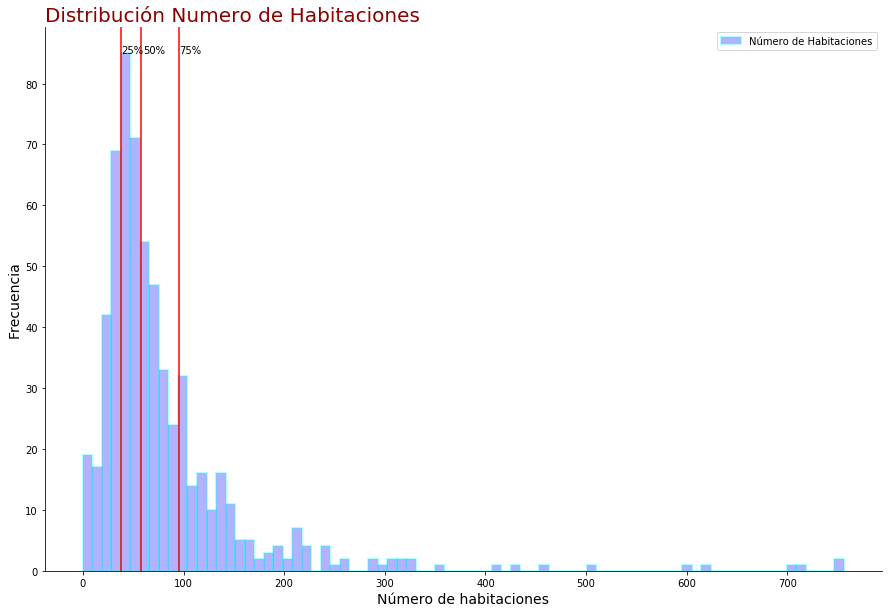

In [8]:
fig, ax = plt.subplots(figsize = (15, 10))

ax.hist(zona_bren.HABITACION, bins = 80, alpha = 0.3,color = 'blue', ec='aqua',linewidth=2, label = 'Número de Habitaciones')
#ax.hist(pairs19.mean_travel_min19, bins = 50, alpha = 0.3,color = 'green', ec='aqua',linewidth=2, label = 2019)
ax.set_ylabel('Frecuencia',fontsize = 14)
ax.set_xlabel('Número de habitaciones', fontsize = 14)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
#plt.text(1500, 6167951.32, "Col: Parque Ind. Eco. Leon/ Pob: 0/ Ventas: $6,167,951.32", horizontalalignment='left', size='medium', color='black', weight='semibold',fontsize = 12)
#plt.text(20, 120, r'N = 23,855, mean = 2.04,  std = 4.973,  max = 150,  min = 1', fontsize=14)
plt.title("Distribución Numero de Habitaciones", loc='left', fontsize=20, fontweight=0, color='darkred')


plt.axvline(x=38, color = 'r')
plt.text(38.1, 85,'25%')
plt.axvline(x=58, color = 'r')
plt.text(59.5, 85,'50%')
plt.axvline(x=96, color = 'r')
plt.text(96.1, 85,'75%')
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
ax.legend()
fig.savefig('/Users/daniel.rodriguez/Documents/HOTELES CDMX/GRAPH/dist_habit.png', format = 'png', dpi = 300, bbox_inches = "tight")

In [9]:
zona_bren[zona_bren['HABITACION']>700]

OBJECTID  Join_Count  TARGET_FID  ID_BASECOM  RTCDMX  RNT           RFC  \
67         68           1          68        68.0   350.0  0.0  HSH6905238BA   
72         73           1          73        73.0   433.0  0.0  AHG130507626   
590       591           1         591       591.0  7471.0  0.0  HHO900507844   

     RTCDMX1                            NOMBRE_COM  \
67     350.0  Sheraton Maria Isabel Hotel & Towers   
72     433.0      Hotel Camino Real Polanco Mexico   
590   7471.0             Hyatt Regency Mexico City   

                                      RAZoN_SOCI                ENCARGADO  \
67                 HOTELES SHERATON S.A. DE C.V.          Marcelo Moretti   
72   ADMINISTRADORA DE HOTELES GRT, S.A. DE C.V.  Norma Miranda Mondragon   
590       HR MC HOTEL COMPANY S. DE R.L. DE C.V.          Thierry Guillot   

       CATEGORiA TIPO_DE_ES  HABITACION   CATEGORiA1  \
67   5 Estrellas      Hotel       756.0  5 Estrellas   
72   5 Estrellas      Hotel       712.0  5 Estrellas   
590  5 Estrellas      Hotel       755.0  5 Estrellas   

                                DOMICILIO            COLONIA      DELEGACIoN  \
67                Paseo de la Reforma 325         Cuauhtemoc      Cuauhtemoc   
72   Calzada General Mariano Escobedo 700            Anzures  Miguel Hidalgo   
590                    Campos Eliseos 204  Polanco V seccion  Miguel Hidalgo   

     CODIGO_POS          y          x               ZONA_TURiS  TELeFONO_1  \
67       6500.0  19.427920 -99.167195  Torre Mayor - Zona Rosa  52425555.0   
72      11590.0  19.427734 -99.179174    Chapultepec - Polanco  52638888.0   
590     11560.0  19.427437 -99.192843    Chapultepec - Polanco  50831234.0   

     TELeFONO_2  Distintivo  Moderniza  Otra  Salones  Capacidad  Salas_de_J  \
67   52424007.0         1.0        0.0   0.0      0.0        0.0         1.0   
72          0.0         0.0        0.0   0.0      0.0        0.0         0.0   
590  52838700.0         1.0        1.0   0.0     11.0     1370.0         2.0   

     Capacidad1  Spa  Gym  Capacidade  Restaurant  Bar  Alberca  Jacuzzi  \
67         20.0  0.0  0.0         1.0         1.0  1.0      0.0      0.0   
72          0.0  0.0  0.0         0.0         1.0  1.0      0.0      0.0   
590        40.0  0.0  1.0         0.0         1.0  1.0      0.0      1.0   

     Lobby_Bar  Cafeteria  Estacionam  Valet_Park  TV_Cable  Taxi  Guia_de_Tu  \
67         0.0        0.0         1.0         0.0       1.0   1.0         0.0   
72         0.0        1.0         1.0         1.0       1.0   1.0         0.0   
590        0.0        1.0         1.0         1.0       1.0   1.0         0.0   

     Arrendador  Aire_Acond  Centro_Eje  Agencia_de  Room_Servi  Servivbar  \
67          0.0         1.0         1.0         0.0         1.0        1.0   
72          0.0         0.0         1.0         0.0         1.0        1.0   
590         0.0         1.0         1.0         1.0         1.0        1.0   

     Caja_de_Se  Cambio_de  Boutique  Floreria  Tabaqueria  Lavanderia  \
67          1.0        0.0       0.0       0.0         0.0         1.0   
72          1.0        1.0       1.0       0.0         0.0         1.0   
590         1.0        1.0       0.0       0.0         0.0         1.0   

     Estetica  Renta_de_P  Servicio_M  Secretaria  NiÃ±era  Juegos_Inf  \
67        0.0         0.0         0.0         0.0      0.0         0.0   
72        0.0         0.0         1.0         0.0      0.0         0.0   
590       1.0         0.0         0.0         1.0      1.0         0.0   

     Tienda_de  Campo_de_G  Cancha_de  Squash  Grupo_de_a  Habitaci_1  \
67         0.0         0.0        0.0     0.0         0.0         1.0   
72         0.0         0.0        0.0     0.0         0.0         0.0   
590        0.0         0.0        0.0     0.0         1.0         1.0   

     Acceso_p_  OBJECTID_1 CVE_ENT CVE_MUN         NOM_MUN    Shape_Leng  \
67         1.0          68      09     015      Cuauht moc  24394.842028

### ¿Cuántos hoteles hay por zona totales?

In [38]:
zona_bren.CAT_Zonas_.unique()

array(['Torre Mayor - Zona Rosa', 'Centro Historico - Alameda',
       'Norte - Basilica de Guadalupe', 'Tlalpan - TaxqueÃ±a',
       'Condesa - Zona Rosa', 'Chapultepec - Polanco',
       'WTC - San Angel - CU', 'Aeropuerto - Foro Sol',
       'Santa Fe - Desierto de los Leones',
       'Iztapalapa - Central de Abastos', 'Perisur - Ajusco', 'Coyoacan',
       'Xochimilco - Milpa Alta -Tlahuac', None], dtype=object)

In [40]:
zona_g = zona_bren.groupby(['CAT_Zonas_','NOMBRE_COM','RTCDMX1']).count().reset_index()

lista_zonas = ['Torre Mayor - Zona Rosa', 'Centro Historico - Alameda',
       'Norte - Basilica de Guadalupe', 'Tlalpan - TaxqueÃ±a',
       'Condesa - Zona Rosa', 'Chapultepec - Polanco',
       'WTC - San Angel - CU', 'Aeropuerto - Foro Sol',
       'Santa Fe - Desierto de los Leones',
       'Iztapalapa - Central de Abastos', 'Perisur - Ajusco', 'Coyoacan',
       'Xochimilco - Milpa Alta -Tlahuac']


for i in lista_zonas:
    print(i+" "+str(len(zona_g[zona_g['CAT_Zonas_']==i])))


Torre Mayor - Zona Rosa 135
Centro Historico - Alameda 97
Norte - Basilica de Guadalupe 94
Tlalpan - TaxqueÃ±a 82
Condesa - Zona Rosa 33
Chapultepec - Polanco 28
WTC - San Angel - CU 41
Aeropuerto - Foro Sol 37
Santa Fe - Desierto de los Leones 14
Iztapalapa - Central de Abastos 20
Perisur - Ajusco 25
Coyoacan 4
Xochimilco - Milpa Alta -Tlahuac 7


### ¿Qué porcentaje del total de hoteles por zona hay en la muestra?

In [28]:
dif_hot = pd.read_csv('/Users/daniel.rodriguez/Documents/HOTELES CDMX/BASES PROCESADAS/hotelestotvshoteles_muestra.csv',sep = ',', encoding = 'utf-8',header = 0, index_col =False)
dif_hot.head()
dif_hot['prc_tot'] = 1-dif_hot['prc_muestra']
dif_hot['prc_muestra'] = dif_hot['prc_muestra']*100
dif_hot['prc_tot'] = dif_hot['prc_tot']*100
dif_hot

CAT_Zonas_  HOTELES_TOTALES  HOTELES_MUESTRA  \
0               Chapultepec - Polanco               28               11   
1                    Perisur - Ajusco               25               15   
2           W.T.C. - San Angel - C.U.               41               20   
3             Torre Mayor - Zona Rosa              135               37   
4   Santa Fe - Desierto de los Leones               14                9   
5                      Condesa - Roma               33                5   
6          Centro Historico - Alameda               97               17   
7                  Tlalpan - Taxquena               82                5   
8                Coyoacan-Xoco-Atoyac                4                3   
9               Aeropuerto - Foro Sol               37                7   
10      Norte - Basilica de Guadalupe               94               14   
11    Iztapalapa - Central de Abastos               20                2   
12  Xochimilco - Milpa Alta - Tlahuac                7                0   

    prc_muestra     prc_tot  
0     39.285714   60.714286  
1     60.000000   40.000000  
2     48.780488   51.219512  
3     27.407407   72.592593  
4     64.285714   35.714286  
5     15.151515   84.848485  
6     17.525773   82.474227  
7      6.097561   93.902439  
8     75.000000   25.000000  
9     18.918919   81.081081  
10    14.893617   85.106383  
11    10.000000   90.000000  
12     0.000000  100.000000

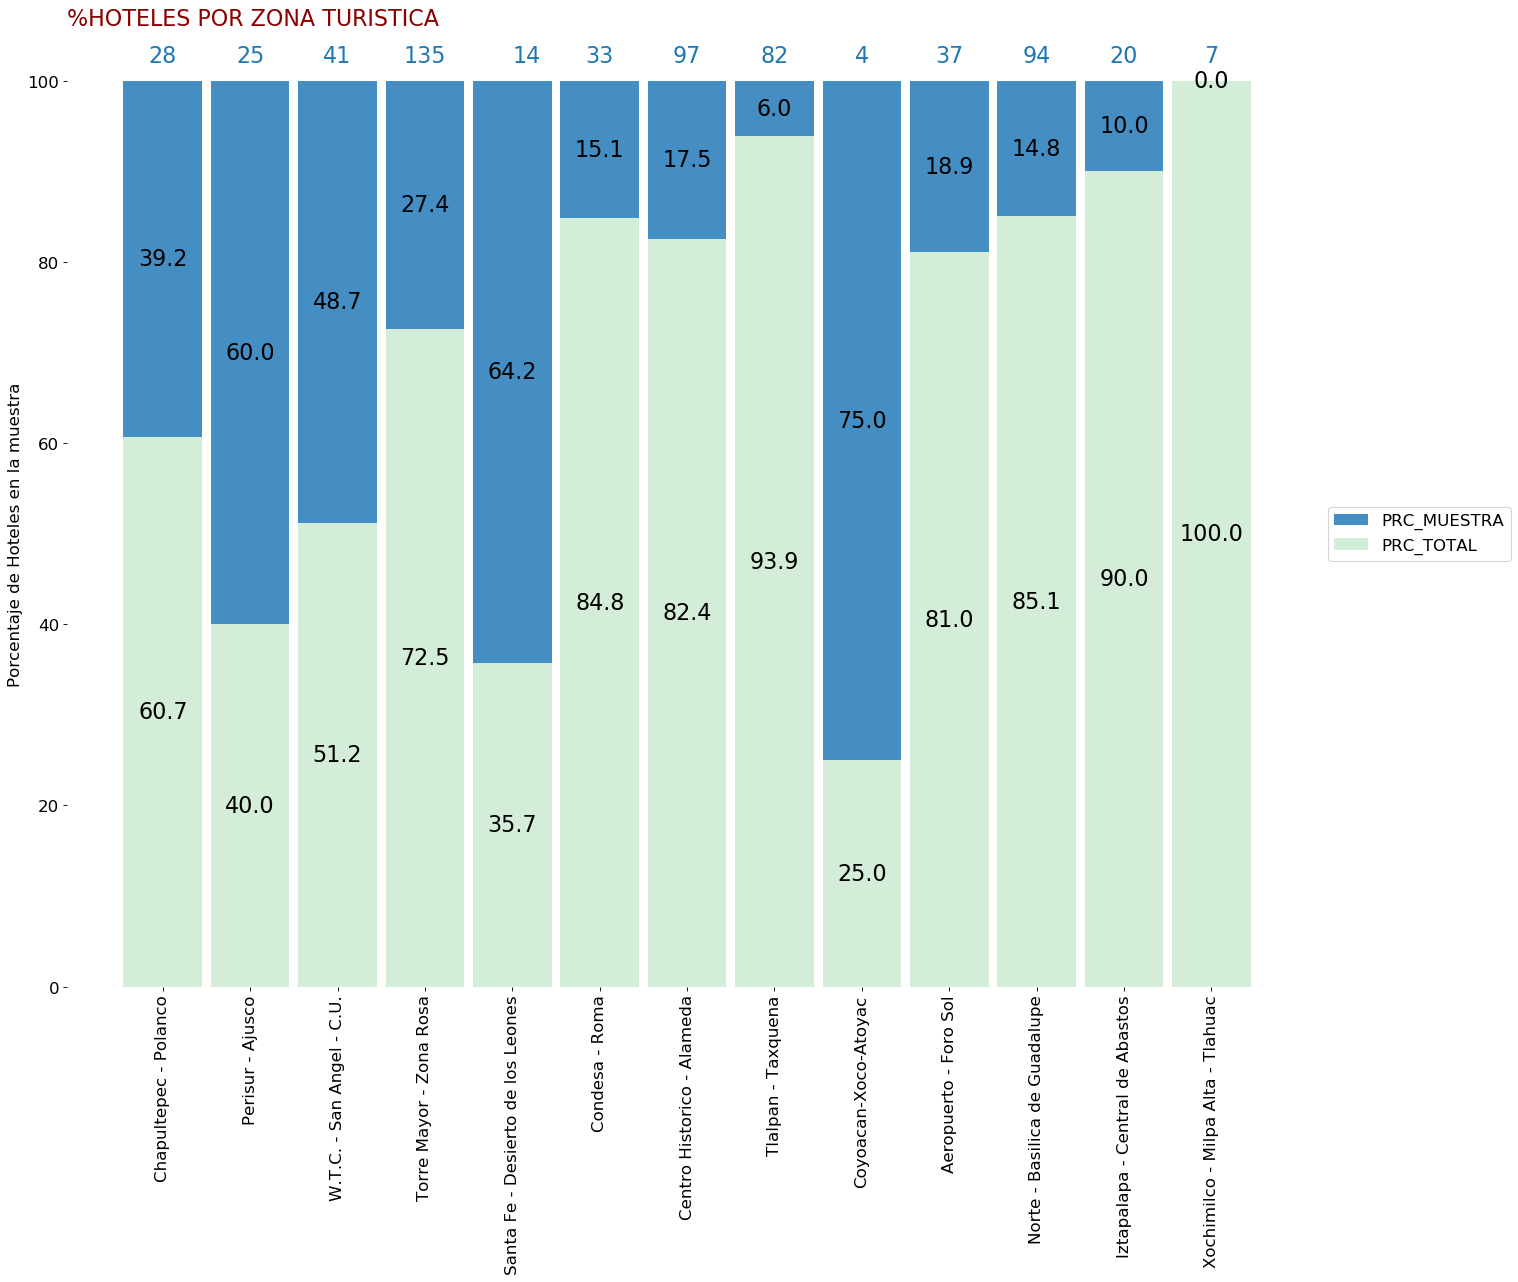

In [23]:
#Función para truncar decimales 
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier




#Hacemos grafica
plt.figure(figsize=(20,15), dpi= 80)


ax1 =plt.bar(dif_hot['CAT_Zonas_'],dif_hot['prc_muestra'], alpha = 0.9, width=.9, label='PRC_MUESTRA', 
        color='#3182bd',bottom=dif_hot['prc_tot'])

ax2 =plt.bar(dif_hot['CAT_Zonas_'], dif_hot['prc_tot'], alpha = 0.5, width=.9, label='PRC_TOTAL',
        color='#a8ddb5')

#Posicionamos las etiquetas
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2.,  h2 + h1/ 2., truncate(h1,1), ha="center", va="center", color="black", fontsize=20,alpha = 1)
    plt.text(r2.get_x() + r2.get_width() / 2.,  h2 / 2., truncate(h2,1), ha="center", va="center", color="black", fontsize=20, alpha = 1)

    
    
plt.text('Chapultepec - Polanco', 102, "28", horizontalalignment='center', size='large', fontsize=20,color='#1f78b4')
plt.text('Perisur - Ajusco', 102, "25", horizontalalignment='center', size='large', fontsize=20,color='#1f78b4')
plt.text('W.T.C. - San Angel - C.U.', 102, "41", horizontalalignment='center', size='large',fontsize=20, color='#1f78b4')
plt.text('Torre Mayor - Zona Rosa', 102, "135", horizontalalignment='center', size='large', fontsize=20,color='#1f78b4')
plt.text('Santa Fe - Desierto de los Leones', 102, "14", horizontalalignment='left', size='large', fontsize=20,color='#1f78b4')
plt.text('Condesa - Roma', 102, "33", horizontalalignment='center', size='large', fontsize=20,color='#1f78b4')
plt.text('Centro Historico - Alameda', 102, "97", horizontalalignment='center', size='large', fontsize=20,color='#1f78b4')
plt.text('Tlalpan - Taxquena', 102, "82", horizontalalignment='center', size='large', fontsize=20,color='#1f78b4')
plt.text('Coyoacan-Xoco-Atoyac', 102, "4", horizontalalignment='center', size='large', fontsize=20,color='#1f78b4')
plt.text('Aeropuerto - Foro Sol', 102, "37", horizontalalignment='center', size='large', fontsize=20,color='#1f78b4')
plt.text('Norte - Basilica de Guadalupe', 102, "94", horizontalalignment='center', size='large',fontsize=20, color='#1f78b4')        
plt.text('Iztapalapa - Central de Abastos', 102, "20", horizontalalignment='center', size='large', fontsize=20,color='#1f78b4') 
plt.text('Xochimilco - Milpa Alta - Tlahuac', 102, "7", horizontalalignment='center', size='large', fontsize=20,color='#1f78b4') 
    
#Posicionamos la leyenda
plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left', prop={'size':15})
plt.xticks(dif_hot['CAT_Zonas_'], fontsize = 15, rotation =90)
plt.yticks(fontsize = 15)
plt.ylabel("Porcentaje de Hoteles en la muestra", fontsize=15)
#plt.xlabel("Countries")
plt.title("%HOTELES POR ZONA TURISTICA", pad = 50,loc='left', fontsize=20, fontweight=0, color='darkred')
plt.ylim=1.0

#Quitamos las lineas 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# rotate axis labels
#plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='center', fontsize = 20)
#plt.setp(plt.gca().get_yticklabels(), fontsize = 15)

#Guardamos grafico
plt.savefig('/Users/daniel.rodriguez/Documents/HOTELES CDMX/GRAPH/prc_hoteles.png', format = 'png', dpi = 300, bbox_inches = "tight")

#Mostramos grafico
plt.show()

### ¿Cuál es el porcentaje de ocupación por día de la semana?

In [41]:
con_g_b = conce_bren.groupby(['CAT_Zonas_','DIAS_SEM']).sum().reset_index()
con_g_b = con_g_b[['CAT_Zonas_','DIAS_SEM','CO','CD','TARIFA_PROMEDIO']]
con_g_b['PRC_OCUP']= con_g_b['CO']/con_g_b['CD']*100
con_g_b.head(15)

CAT_Zonas_   DIAS_SEM       CO        CD  TARIFA_PROMEDIO  \
0        Aeropuerto-Foro Sol    DOMINGO  60214.0   80475.0        736029.42   
1        Aeropuerto-Foro Sol     JUEVES  71492.0   79520.0        846349.52   
2        Aeropuerto-Foro Sol      LUNES  64360.0   79520.0        781880.57   
3        Aeropuerto-Foro Sol     MARTES  68074.0   79520.0        818725.00   
4        Aeropuerto-Foro Sol  MIERCOLES  70684.0   79520.0        833656.36   
5        Aeropuerto-Foro Sol     SABADO  57197.0   79440.0        708584.45   
6        Aeropuerto-Foro Sol    VIERNES  63210.0   79440.0        741664.50   
7   Centro Historico-Alameda    DOMINGO  65600.0  100328.0       1380207.21   
8   Centro Historico-Alameda     JUEVES  77197.0   99427.0       1418893.85   
9   Centro Historico-Alameda      LUNES  67135.0   99608.0       1391371.87   
10  Centro Historico-Alameda     MARTES  72180.0   99620.0       1394775.40   
11  Centro Historico-Alameda  MIERCOLES  76042.0   99586.0       1416907.45   
12  Centro Historico-Alameda     SABADO  77800.0   99169.0       1445827.64   
13  Centro Historico-Alameda    VIERNES  76828.0   99249.0       1432347.14   
14       Chapultepec-Polanco    DOMINGO  86900.0  159955.0       1595432.66   

     PRC_OCUP  
0   74.823237  
1   89.904427  
2   80.935614  
3   85.606137  
4   88.888330  
5   72.000252  
6   79.569486  
7   65.385535  
8   77.641888  
9   67.399205  
10  72.455330  
11  76.358123  
12  78.451936  
13  77.409344  
14  54.327780

In [42]:
fin_sem = ['SABADO','DOMINGO']
sem = ['LUNES','MARTES','MIERCOLES','JUEVES','VIERNES']

aer_foro_fin = con_g_b[(con_g_b['CAT_Zonas_']=='Aeropuerto-Foro Sol')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
aer_foro_sem = con_g_b[(con_g_b['CAT_Zonas_']=='Aeropuerto-Foro Sol')&(con_g_b['DIAS_SEM'].isin(sem))]

cen_alameda_fin = con_g_b[(con_g_b['CAT_Zonas_']=='Centro Historico-Alameda')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
cen_alameda_sem = con_g_b[(con_g_b['CAT_Zonas_']=='Centro Historico-Alameda')&(con_g_b['DIAS_SEM'].isin(sem))]

chap_pol_fin = con_g_b[(con_g_b['CAT_Zonas_']=='Chapultepec-Polanco')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
chap_pol_sem = con_g_b[(con_g_b['CAT_Zonas_']=='Chapultepec-Polanco')&(con_g_b['DIAS_SEM'].isin(sem))]

cond_rom_fin = con_g_b[(con_g_b['CAT_Zonas_']=='Condesa-Roma')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
cond_rom_sem = con_g_b[(con_g_b['CAT_Zonas_']=='Condesa-Roma')&(con_g_b['DIAS_SEM'].isin(sem))]

coyo_xo_ato_fin = con_g_b[(con_g_b['CAT_Zonas_']=='Coyoacan-Xoco-Atoyac')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
coyo_xo_ato_sem = con_g_b[(con_g_b['CAT_Zonas_']=='Coyoacan-Xoco-Atoyac')&(con_g_b['DIAS_SEM'].isin(sem))]

izt_abasto_fin = con_g_b[(con_g_b['CAT_Zonas_']=='Iztapalapa-Central de Abasto')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
izt_abasto_sem = con_g_b[(con_g_b['CAT_Zonas_']=='Iztapalapa-Central de Abasto')&(con_g_b['DIAS_SEM'].isin(sem))]

nte_basi_fin = con_g_b[(con_g_b['CAT_Zonas_']=='Norte-Basilica de Guadalupe')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
nte_basi_sem = con_g_b[(con_g_b['CAT_Zonas_']=='Norte-Basilica de Guadalupe')&(con_g_b['DIAS_SEM'].isin(sem))]

peri_ajusco_fin = con_g_b[(con_g_b['CAT_Zonas_']=='Perisur-Ajusco')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
peri_ajusco_sem = con_g_b[(con_g_b['CAT_Zonas_']=='Perisur-Ajusco')&(con_g_b['DIAS_SEM'].isin(sem))]

stafe_leo_fin = con_g_b[(con_g_b['CAT_Zonas_']=='Santa Fe-Desierto de los Leones')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
stafe_leo_sem = con_g_b[(con_g_b['CAT_Zonas_']=='Santa Fe-Desierto de los Leones')&(con_g_b['DIAS_SEM'].isin(sem))]

tlal_tax_fin = con_g_b[(con_g_b['CAT_Zonas_']=='Tlalpan-Taxquena')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
tlal_tax_sem = con_g_b[(con_g_b['CAT_Zonas_']=='Tlalpan-Taxquena')&(con_g_b['DIAS_SEM'].isin(sem))]

torre_rosa_fin = con_g_b[(con_g_b['CAT_Zonas_']=='Torre Mayor-Zona Rosa')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
torre_rosa_sem = con_g_b[(con_g_b['CAT_Zonas_']=='Torre Mayor-Zona Rosa')&(con_g_b['DIAS_SEM'].isin(sem))]

wtc_angel_cu_fin = con_g_b[(con_g_b['CAT_Zonas_']=='W.T.C.-San Angel-C.U.')&(con_g_b['DIAS_SEM'].isin(fin_sem))]
wtc_angel_cu_sem = con_g_b[(con_g_b['CAT_Zonas_']=='W.T.C.-San Angel-C.U.')&(con_g_b['DIAS_SEM'].isin(sem))]
                     

In [44]:
fin_semana_b = pd.concat([aer_foro_fin.reset_index(drop = True),
                        cen_alameda_fin.reset_index(drop = True),
                        chap_pol_fin.reset_index(drop = True),
                        cond_rom_fin.reset_index(drop = True),
                        coyo_xo_ato_fin.reset_index(drop = True),
                        izt_abasto_fin.reset_index(drop = True),
                        nte_basi_fin.reset_index(drop = True),
                        peri_ajusco_fin.reset_index(drop = True),
                        stafe_leo_fin.reset_index(drop = True),
                        tlal_tax_fin.reset_index(drop = True),
                        torre_rosa_fin.reset_index(drop = True),
                        wtc_angel_cu_fin.reset_index(drop = True)], axis = 0)

semana_b = pd.concat([aer_foro_sem.reset_index(drop = True),
                    cen_alameda_sem.reset_index(drop = True),
                    chap_pol_sem.reset_index(drop = True),
                    cond_rom_sem.reset_index(drop = True),
                    coyo_xo_ato_sem.reset_index(drop = True),
                    izt_abasto_sem.reset_index(drop = True),
                    nte_basi_sem.reset_index(drop = True),
                    peri_ajusco_sem.reset_index(drop = True),
                    stafe_leo_sem.reset_index(drop = True),
                    tlal_tax_sem.reset_index(drop = True),
                    torre_rosa_sem.reset_index(drop = True),
                    wtc_angel_cu_sem.reset_index(drop = True)], axis = 0)

dia_semana_b = pd.concat([fin_semana_b.reset_index(drop= True), semana_b.reset_index(drop=True)], axis = 0)

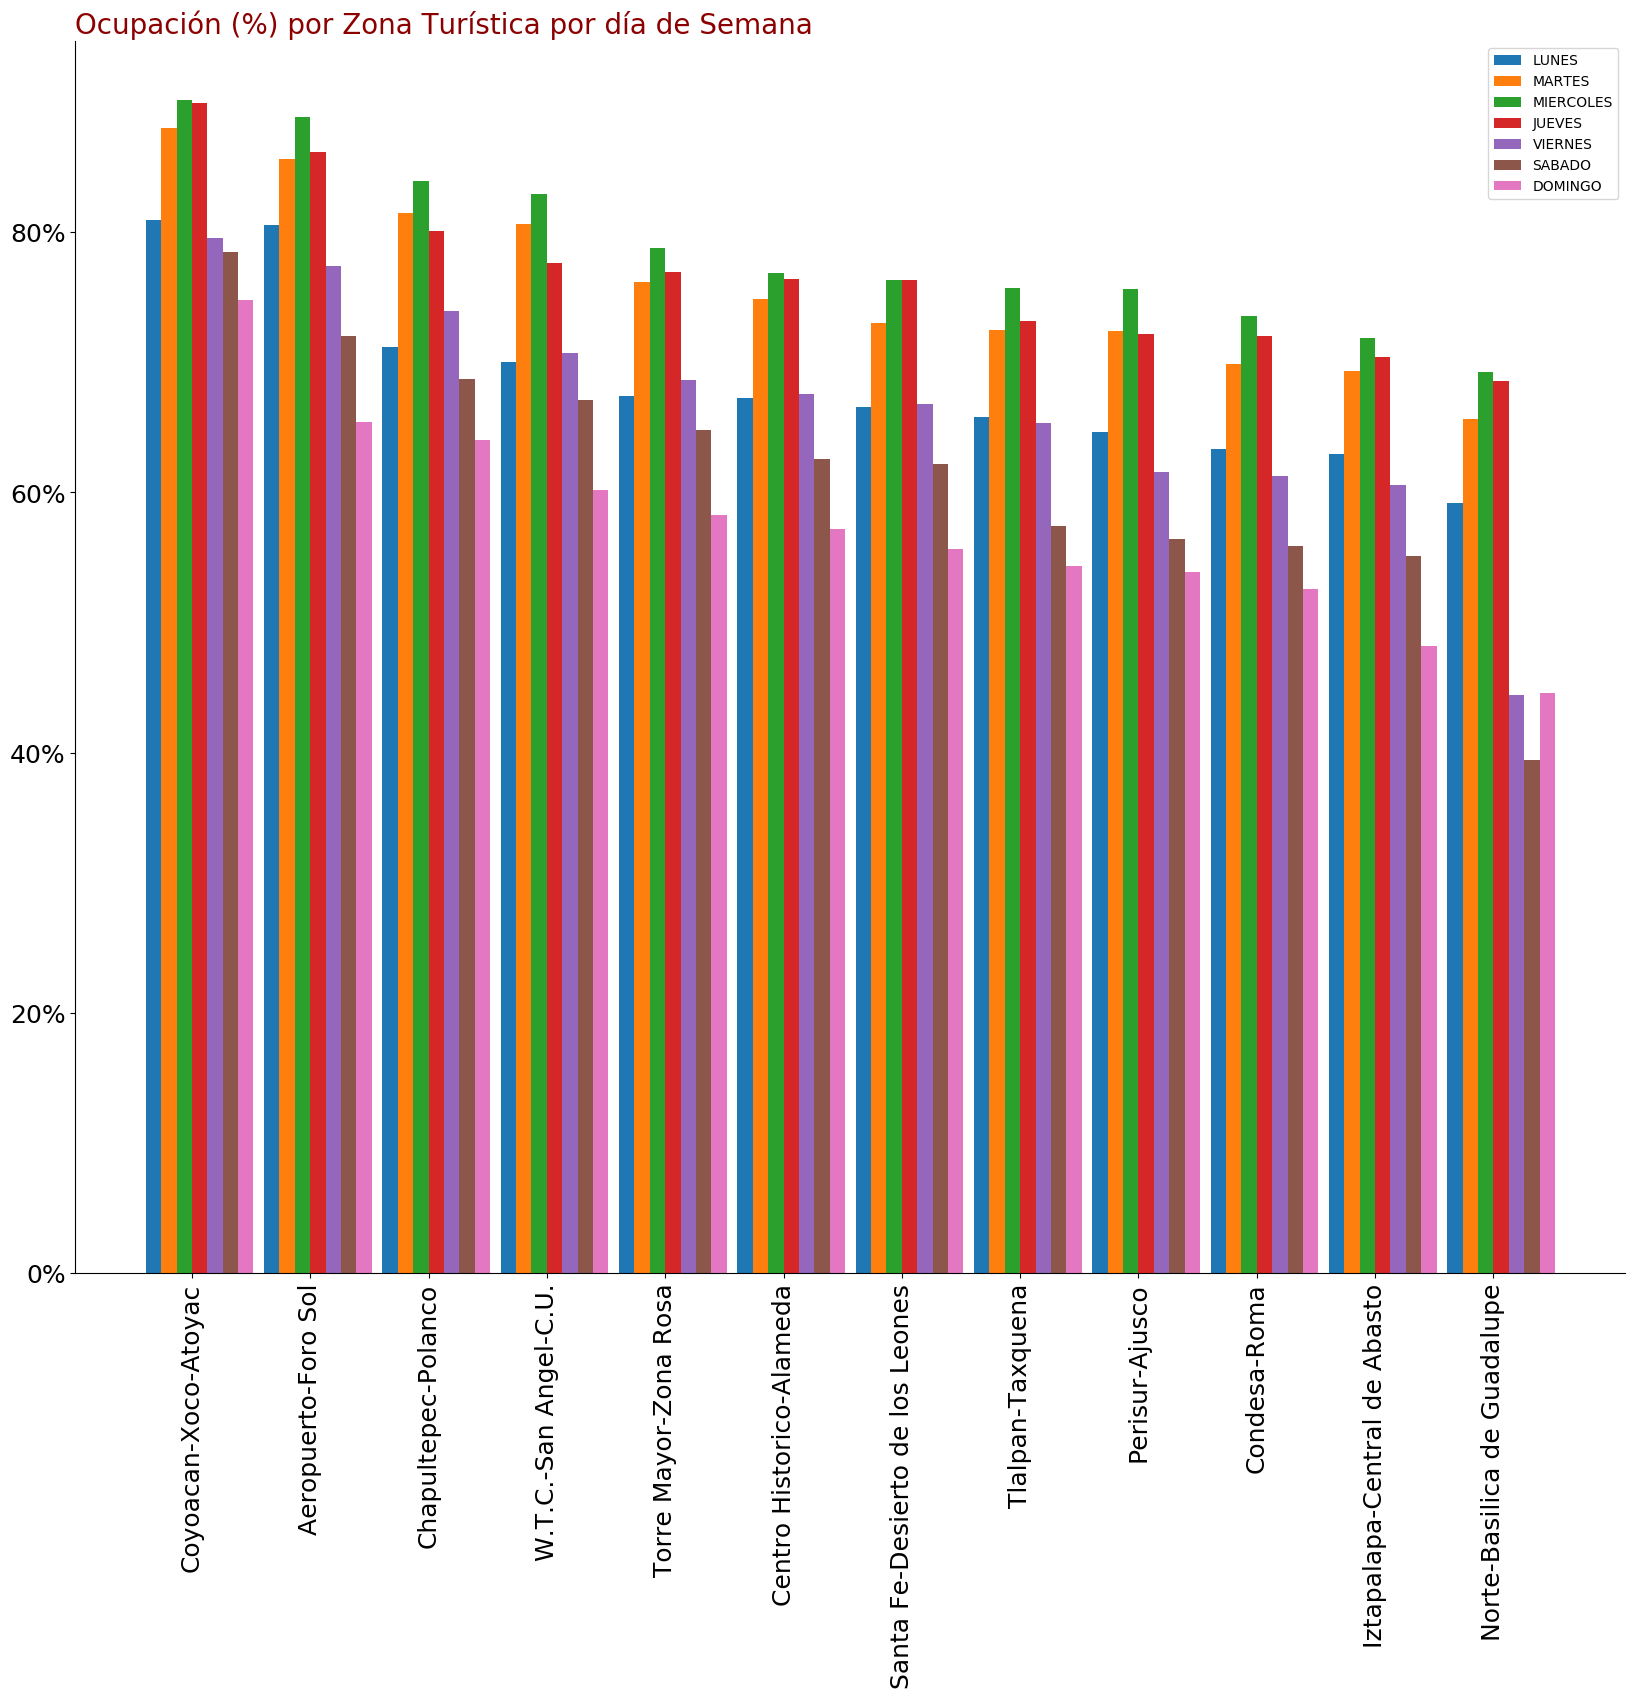

In [182]:
fig, ax = plt.subplots(figsize=(20, 16))
order_sem = dia_semana_b.sort_values('PRC_OCUP', ascending= False)

x = np.arange(len(order_sem.CAT_Zonas_.unique()))

bar_width = 0.13

b1 = ax.bar(x, order_sem.loc[order_sem['DIAS_SEM']=='LUNES','PRC_OCUP'], width = bar_width, label = 'LUNES')
b2 = ax.bar(x+bar_width, order_sem.loc[order_sem['DIAS_SEM']=='MARTES','PRC_OCUP'], width = bar_width,label = 'MARTES')
b3 = ax.bar(x+bar_width+bar_width, order_sem.loc[order_sem['DIAS_SEM']=='MIERCOLES','PRC_OCUP'], width = bar_width,label = 'MIERCOLES')
b4 = ax.bar(x+bar_width+bar_width+bar_width, order_sem.loc[order_sem['DIAS_SEM']=='JUEVES','PRC_OCUP'], width = bar_width,label = 'JUEVES')
b5 = ax.bar(x+bar_width+bar_width+bar_width+bar_width, order_sem.loc[order_sem['DIAS_SEM']=='VIERNES','PRC_OCUP'], width = bar_width,label = 'VIERNES')
b6 = ax.bar(x+bar_width+bar_width+bar_width+bar_width+bar_width, order_sem.loc[order_sem['DIAS_SEM']=='SABADO','PRC_OCUP'], width = bar_width,label = 'SABADO')
b7 = ax.bar(x+bar_width+bar_width+bar_width+bar_width+bar_width+bar_width, order_sem.loc[order_sem['DIAS_SEM']=='DOMINGO','PRC_OCUP'], width = bar_width,label = 'DOMINGO')

vals = ax.get_yticks()

ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals],fontsize = 13)
#plt.xticks(fontsize = 12)

ax.legend()
plt.title("Ocupación (%) por Zona Turística por día de Semana", loc='left', fontsize=20, fontweight=0, color='darkred')
# Fix the x-axes.
ax.set_xticks([p + 2.5 * bar_width for p in x])
ax.set_xticklabels(order_sem.CAT_Zonas_.unique())
ax.tick_params(axis = 'x',rotation = 90,labelsize = 18)
ax.tick_params(axis = 'y',labelsize = 18)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

fig.savefig('/Users/daniel.rodriguez/Documents/HOTELES CDMX/GRAPH/ocupa_sem_bren.png', format = 'png', dpi = 300, bbox_inches = "tight")

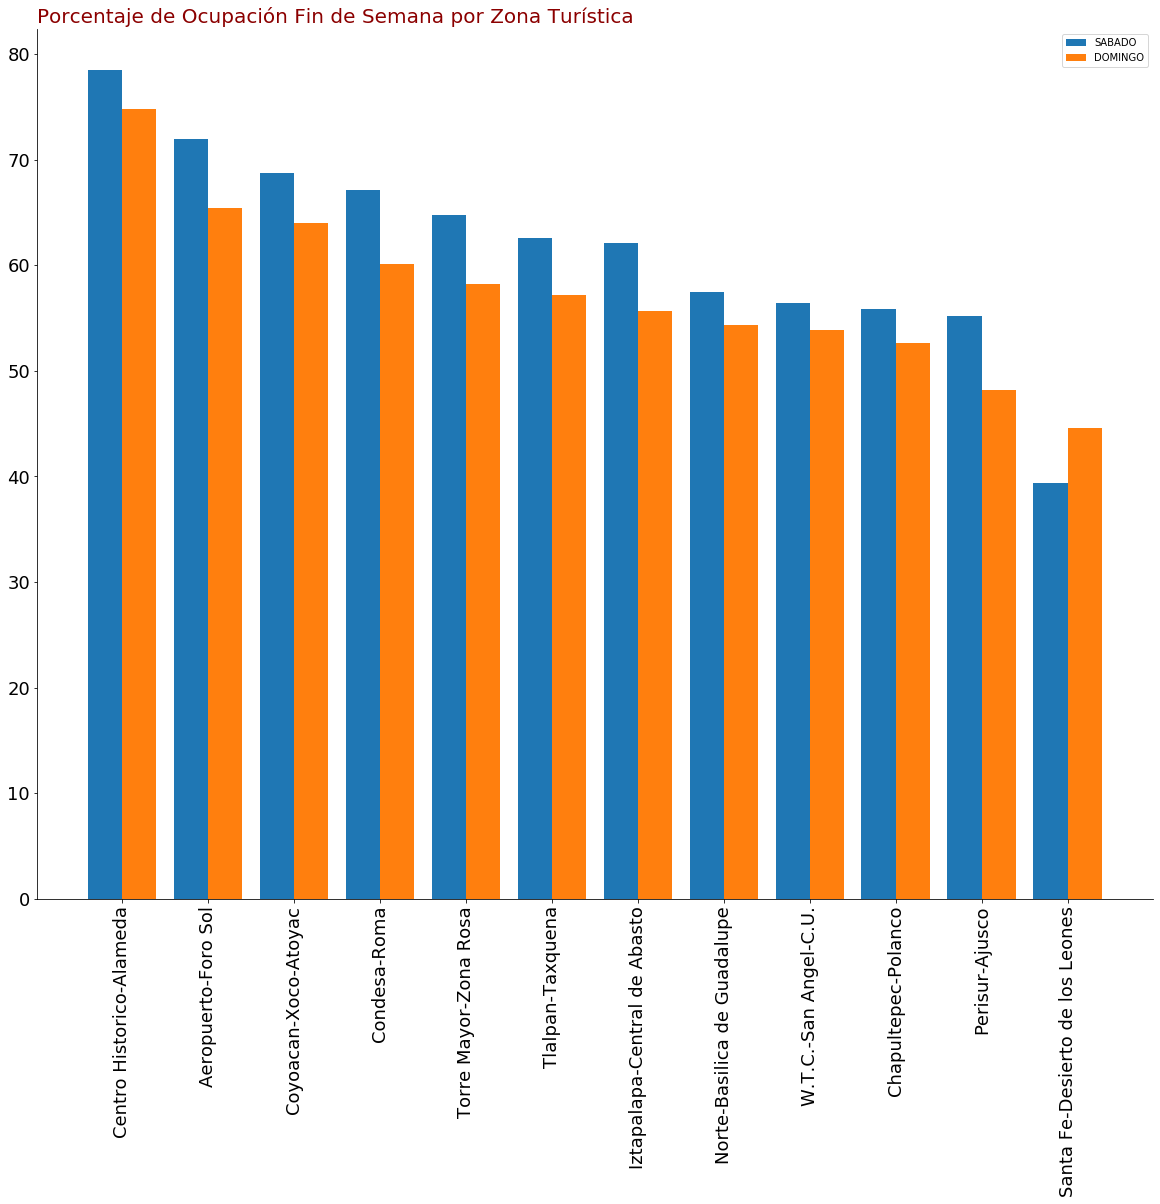

In [46]:
fig, ax = plt.subplots(figsize=(20, 16))
order_fin = fin_semana_b.sort_values('PRC_OCUP', ascending= False)

x = np.arange(len(order_fin.CAT_Zonas_.unique()))

bar_width = 0.4

b1 = ax.bar(x, order_fin.loc[order_fin['DIAS_SEM']=='SABADO','PRC_OCUP'], width = bar_width, label = 'SABADO')

b2 = ax.bar(x + bar_width, order_fin.loc[order_fin['DIAS_SEM']=='DOMINGO','PRC_OCUP'], width = bar_width,label = 'DOMINGO')

ax.legend()
plt.title("Porcentaje de Ocupación Fin de Semana por Zona Turística", loc='left', fontsize=20, fontweight=0, color='darkred')
# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(order_fin.CAT_Zonas_.unique())
ax.tick_params(axis = 'x',rotation = 90,labelsize = 18)
ax.tick_params(axis = 'y',labelsize = 18)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

fig.savefig('/Users/daniel.rodriguez/Documents/HOTELES CDMX/GRAPH/ocupa_fin_bren.png', format = 'png', dpi = 300, bbox_inches = "tight")

### ¿Cómo se comporta el porcentaje de ocupación por mes y semana del año 2018 y 2019?

In [12]:
conce_bren.columns

Index(['NOMBRE_HOTEL', 'RTCDMX', 'ZONA_TURISTICA', 'CATEGORIA', 'FECHA',
       'SEMANA', 'DIAS_SEM', 'DIAS_MES', 'MES', 'MES_NUM', 'AÑO', 'CO', 'CD',
       'PRC_OCUP', 'TARIFA_PROMEDIO', 'CAT_Zonas_', 'bool'],
      dtype='object')

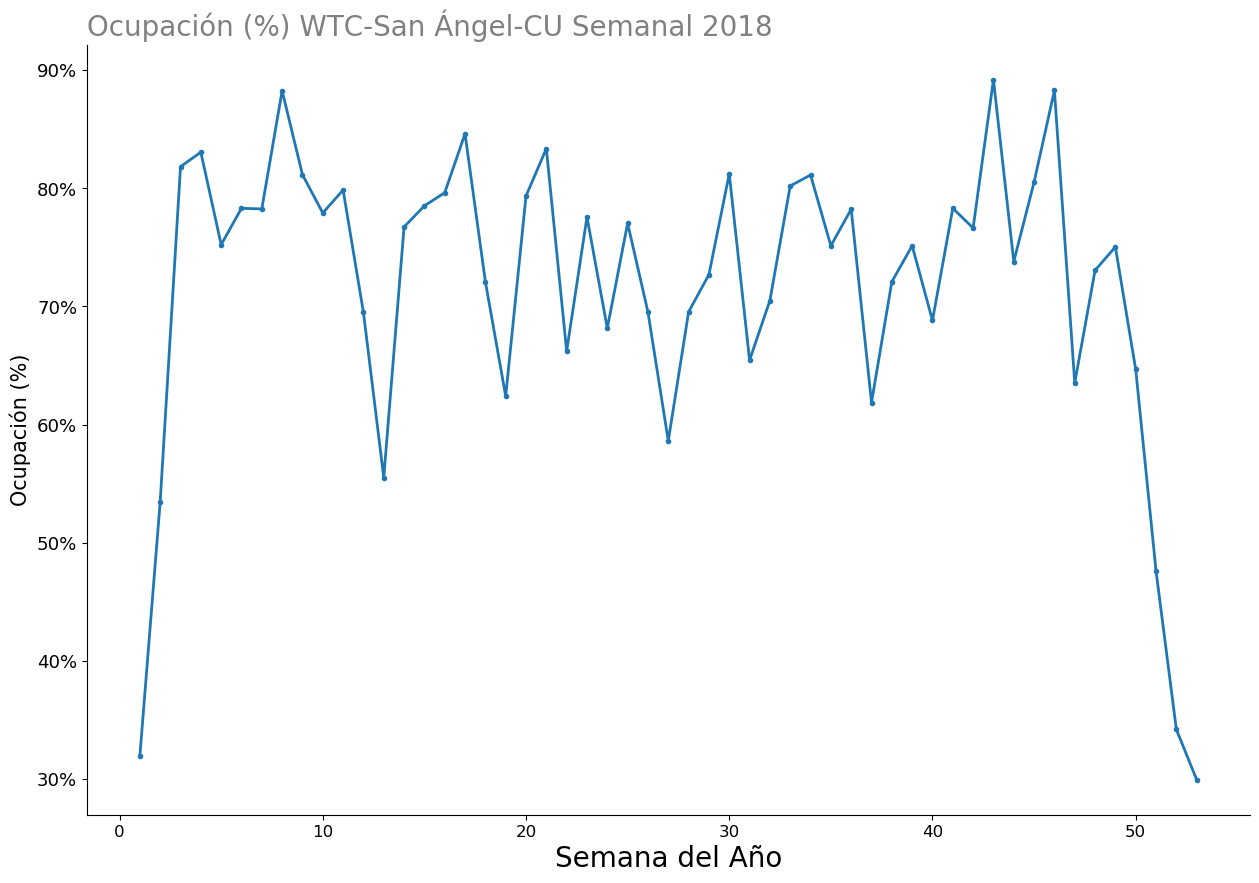

In [15]:
plt.style.use('default')

concentrado1 = conce_bren[conce_bren['AÑO']==2018]

table = pd.pivot_table(concentrado1, values = 'PRC_OCUP', index = ['CAT_Zonas_'], columns = ['SEMANA'])
table = table.reset_index()

#table = table[['CAT_Zonas_','ENERO', 'FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']]



x1 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53]

y1 = table.iloc[0,1:54].values*100
y2 = table.iloc[1,1:54].values*100
y3 = table.iloc[2,1:54].values*100
y4 = table.iloc[3,1:54].values*100
y5 = table.iloc[4,1:54].values*100
y6 = table.iloc[5,1:54].values*100
y7 = table.iloc[6,1:54].values*100
y8 = table.iloc[7,1:54].values*100
y9 = table.iloc[8,1:54].values*100
y10 = table.iloc[9,1:54].values*100
y11 = table.iloc[10,1:54].values*100
y12 = table.iloc[11,1:54].values*100


fig, ax = plt.subplots(figsize=(15, 10))
 

#ax.plot(x1, y1, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[0,'CAT_Zonas_'])
#ax.plot(x1, y2, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[1,'CAT_Zonas_'])
#ax.plot(x1, y3, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[2,'CAT_Zonas_'])
#ax.plot(x1, y4, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[3,'CAT_Zonas_'])
#ax.plot(x1, y5, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[4,'CAT_Zonas_'])
#ax.plot(x1, y6, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[5,'CAT_Zonas_'])
#ax.plot(x1, y7, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[6,'CAT_Zonas_'])
#ax.plot(x1, y8, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[7,'CAT_Zonas_'])
#ax.plot(x1, y9, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[8,'CAT_Zonas_'])
#ax.plot(x1, y10, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[9,'CAT_Zonas_'])
#ax.plot(x1, y11, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[10,'CAT_Zonas_'])
ax.plot(x1, y12, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[11,'CAT_Zonas_'])

vals = ax.get_yticks()

ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals],fontsize = 13)
plt.xticks(fontsize = 12)
        
#plt.text('DICIEMBRE', table.loc[0,'DICIEMBRE'], " Aeropuerto-Foro Sol", horizontalalignment='left', size='large', color='#a6cee3')
#plt.text('DICIEMBRE', table.loc[1,'DICIEMBRE'], " Centro Histórico-Alameda", horizontalalignment='left', size='large', color='#1f78b4')
#plt.text('DICIEMBRE', table.loc[2,'DICIEMBRE'], " Chapultepec-Polanco", horizontalalignment='left', size='large', color='#b2df8a')
#plt.text('DICIEMBRE', table.loc[3,'DICIEMBRE'], " Condesa-Roma", horizontalalignment='left', size='large', color='#33a02c')
#plt.text('DICIEMBRE', table.loc[4,'DICIEMBRE'], " Coyoacán-Xoco-Atoyac", horizontalalignment='left', size='large', color='#fb9a99')
#plt.text('DICIEMBRE', table.loc[5,'DICIEMBRE'], " Iztapalapa-Central de Abasto5", horizontalalignment='left', size='large', color='#e31a1c')
#plt.text('DICIEMBRE', table.loc[6,'DICIEMBRE'], " Norte-Basílica de Guadalupe", horizontalalignment='left', size='large', color='#fdbf6f')
#plt.text('DICIEMBRE', table.loc[7,'DICIEMBRE'], " Perisur-Ajusco", horizontalalignment='left', size='large', color='#ff7f00')
#plt.text('DICIEMBRE', table.loc[8,'DICIEMBRE'], " Santa Fe-Desierto de los Leones", horizontalalignment='left', size='large', color='#cab2d6')
#plt.text('DICIEMBRE', table.loc[9,'DICIEMBRE'], " Tlalpan-Taxqueña", horizontalalignment='left', size='large', color='#6a3d9a')
#plt.text('DICIEMBRE', table.loc[10,'DICIEMBRE'], " Torre Mayor-Zona Rosa", horizontalalignment='left', size='large', color='#ffff99')        
#plt.text('DICIEMBRE', table.loc[11,'DICIEMBRE'], " W.T.C.-San Ángel-C.U", horizontalalignment='left', size='large', color='#b15928')        
        
plt.ylabel("Ocupación (%)",fontsize =15)
plt.xlabel("Semana del Año",fontsize =20)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
#ax.grid(axis ='both', color = 'silver', linewidth = 0.5, alpha = 0.5)
#ax.legend()
plt.title("Ocupación (%) WTC-San Ángel-CU Semanal 2018", loc='left', fontsize=20, fontweight=0, color='gray')

fig.savefig('/Users/daniel.rodriguez/Documents/HOTELES CDMX/GRAPH/prc_ocupa_sem_wtc18.png', format = 'png', dpi = 300, bbox_inches = "tight")



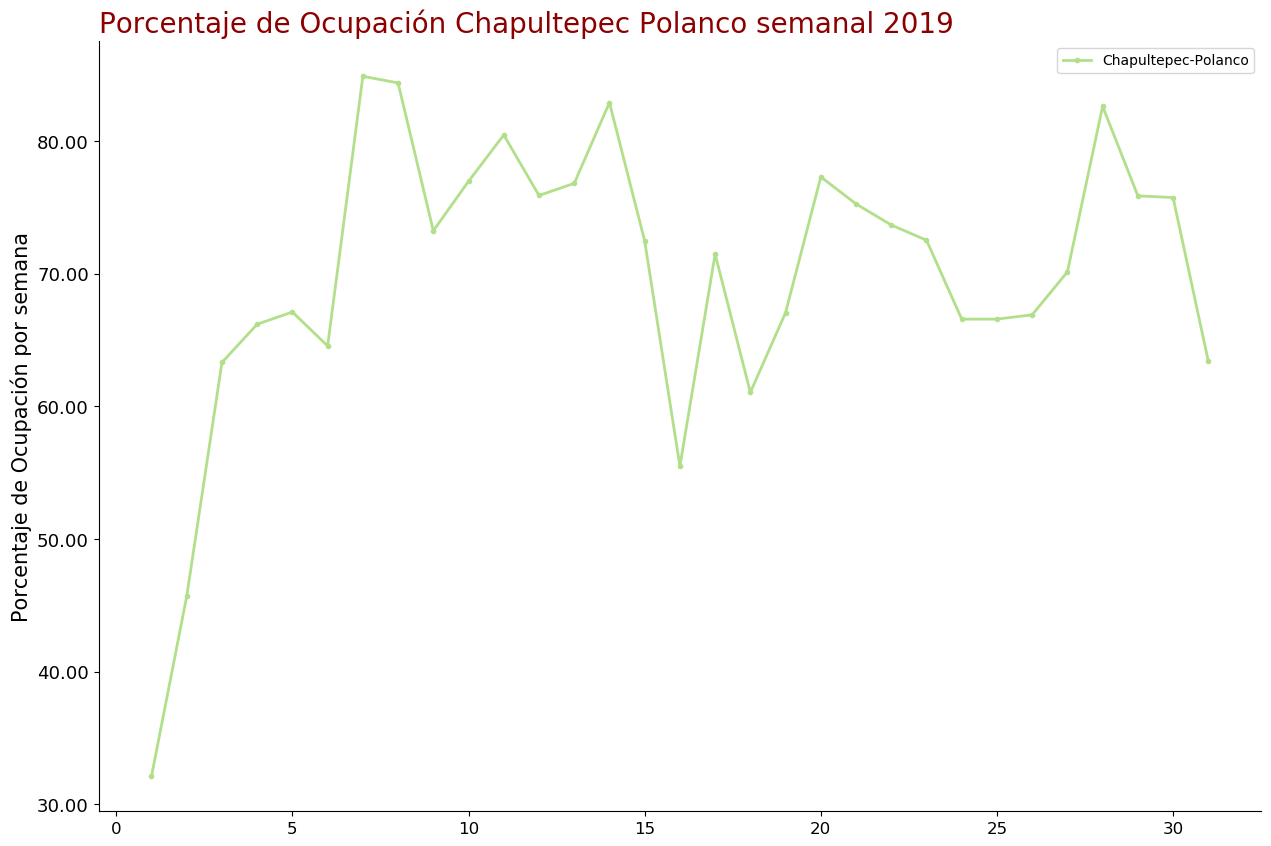

In [97]:
plt.style.use('default')

concentrado1 = conce_bren[conce_bren['AÑO']==2019]

table = pd.pivot_table(concentrado1, values = 'PRC_OCUP', index = ['CAT_Zonas_'], columns = ['SEMANA'])
table = table.reset_index()
#table = table[['CAT_Zonas_','ENERO', 'FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']]



x1 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

y1 = table.iloc[0,1:32].values*100
y2 = table.iloc[1,1:32].values*100
y3 = table.iloc[2,1:32].values*100
y4 = table.iloc[3,1:32].values*100
y5 = table.iloc[4,1:32].values*100
y6 = table.iloc[5,1:32].values*100
y7 = table.iloc[6,1:32].values*100
y8 = table.iloc[7,1:32].values*100
y9 = table.iloc[8,1:32].values*100
y10 = table.iloc[9,1:32].values*100
y11 = table.iloc[10,1:32].values*100
y12 = table.iloc[11,1:32].values*100


fig, ax = plt.subplots(figsize=(15, 10))
 

#ax.plot(x1, y1, marker='.', color='#a6cee3', alpha = 1, linewidth=2, label=table.loc[0,'CAT_Zonas_'])
#ax.plot(x1, y2, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[1,'CAT_Zonas_'])
ax.plot(x1, y3, marker='.', color='#b2df8a', alpha = 1, linewidth=2, label=table.loc[2,'CAT_Zonas_'])
#ax.plot(x1, y4, marker='.', color='#33a02c', alpha = 1, linewidth=2, label=table.loc[3,'CAT_Zonas_'])
#ax.plot(x1, y5, marker='.', color='#fb9a99', alpha = 1, linewidth=2, label=table.loc[4,'CAT_Zonas_'])
#ax.plot(x1, y6, marker='.', color='#e31a1c', alpha = 1, linewidth=2, label=table.loc[5,'CAT_Zonas_'])
#ax.plot(x1, y7, marker='.', color='#fdbf6f', alpha = 1, linewidth=2, label=table.loc[6,'CAT_Zonas_'])
#ax.plot(x1, y8, marker='.', color='#ff7f00', alpha = 1, linewidth=2, label=table.loc[7,'CAT_Zonas_'])
#ax.plot(x1, y9, marker='.', color='#cab2d6', alpha = 1, linewidth=2, label=table.loc[8,'CAT_Zonas_'])
#ax.plot(x1, y10, marker='.', color='#6a3d9a', alpha = 1, linewidth=2, label=table.loc[9,'CAT_Zonas_'])
#ax.plot(x1, y11, marker='.', color='#ffff99', alpha = 1, linewidth=2, label=table.loc[10,'CAT_Zonas_'])
#ax.plot(x1, y12, marker='.', color='#b15928', alpha = 1, linewidth=2, label=table.loc[11,'CAT_Zonas_'])

vals = ax.get_yticks()

ax.set_yticklabels(['{:,.2f}'.format(x) for x in vals],fontsize = 13)
plt.xticks(fontsize = 12)
        
#plt.text('DICIEMBRE', table.loc[0,'DICIEMBRE'], " Aeropuerto-Foro Sol", horizontalalignment='left', size='large', color='#a6cee3')
#plt.text('DICIEMBRE', table.loc[1,'DICIEMBRE'], " Centro Histórico-Alameda", horizontalalignment='left', size='large', color='#1f78b4')
#plt.text('DICIEMBRE', table.loc[2,'DICIEMBRE'], " Chapultepec-Polanco", horizontalalignment='left', size='large', color='#b2df8a')
#plt.text('DICIEMBRE', table.loc[3,'DICIEMBRE'], " Condesa-Roma", horizontalalignment='left', size='large', color='#33a02c')
#plt.text('DICIEMBRE', table.loc[4,'DICIEMBRE'], " Coyoacán-Xoco-Atoyac", horizontalalignment='left', size='large', color='#fb9a99')
#plt.text('DICIEMBRE', table.loc[5,'DICIEMBRE'], " Iztapalapa-Central de Abasto5", horizontalalignment='left', size='large', color='#e31a1c')
#plt.text('DICIEMBRE', table.loc[6,'DICIEMBRE'], " Norte-Basílica de Guadalupe", horizontalalignment='left', size='large', color='#fdbf6f')
#plt.text('DICIEMBRE', table.loc[7,'DICIEMBRE'], " Perisur-Ajusco", horizontalalignment='left', size='large', color='#ff7f00')
#plt.text('DICIEMBRE', table.loc[8,'DICIEMBRE'], " Santa Fe-Desierto de los Leones", horizontalalignment='left', size='large', color='#cab2d6')
#plt.text('DICIEMBRE', table.loc[9,'DICIEMBRE'], " Tlalpan-Taxqueña", horizontalalignment='left', size='large', color='#6a3d9a')
#plt.text('DICIEMBRE', table.loc[10,'DICIEMBRE'], " Torre Mayor-Zona Rosa", horizontalalignment='left', size='large', color='#ffff99')        
#plt.text('DICIEMBRE', table.loc[11,'DICIEMBRE'], " W.T.C.-San Ángel-C.U", horizontalalignment='left', size='large', color='#b15928')        
        
plt.ylabel("Porcentaje de Ocupación por semana",fontsize =15)
plt.xlabel("",fontsize =20)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
#ax.grid(axis ='both', color = 'silver', linewidth = 0.5, alpha = 0.5)
ax.legend()
plt.title("Porcentaje de Ocupación Chapultepec Polanco semanal 2019", loc='left', fontsize=20, fontweight=0, color='darkred')

fig.savefig('/Users/daniel.rodriguez/Documents/HOTELES CDMX/GRAPH/prc_ocupa_sem_bren_chapul_pol19.png', format = 'png', dpi = 300, bbox_inches = "tight")

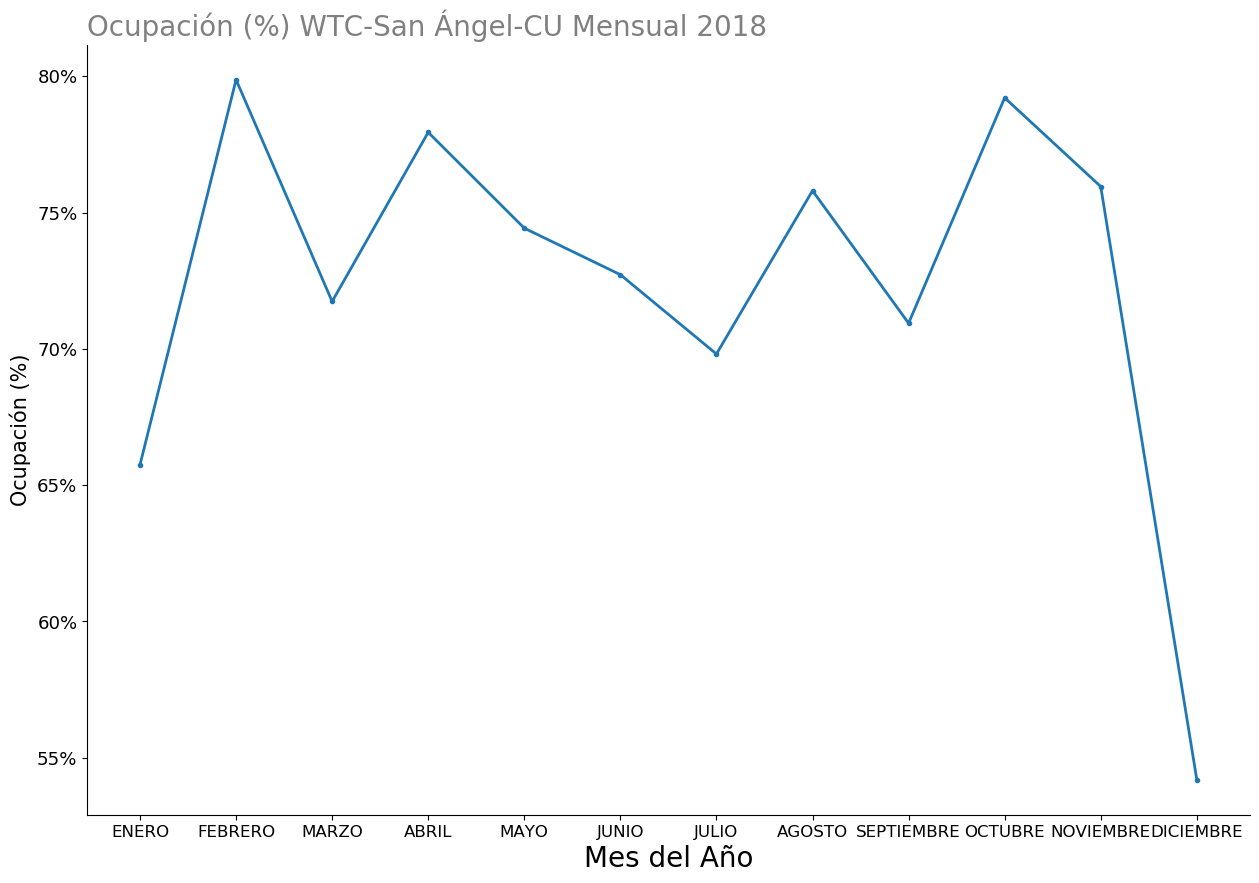

In [23]:
concentrado1 = conce_bren[conce_bren['AÑO']==2018]

table = pd.pivot_table(concentrado1, values = 'PRC_OCUP', index = ['CAT_Zonas_'], columns = ['MES'])
table = table.reset_index()
table = table[['CAT_Zonas_','ENERO', 'FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']]



x1 = ['ENERO', 'FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']

y1 = table.loc[0,'ENERO':'DICIEMBRE'].values*100
y2 = table.loc[1,'ENERO':'DICIEMBRE'].values*100
y3 = table.loc[2,'ENERO':'DICIEMBRE'].values*100
y4 = table.loc[3,'ENERO':'DICIEMBRE'].values*100
y5 = table.loc[4,'ENERO':'DICIEMBRE'].values*100
y6 = table.loc[5,'ENERO':'DICIEMBRE'].values*100
y7 = table.loc[6,'ENERO':'DICIEMBRE'].values*100
y8 = table.loc[7,'ENERO':'DICIEMBRE'].values*100
y9 = table.loc[8,'ENERO':'DICIEMBRE'].values*100
y10 = table.loc[9,'ENERO':'DICIEMBRE'].values*100
y11 = table.loc[10,'ENERO':'DICIEMBRE'].values*100
y12 = table.loc[11,'ENERO':'DICIEMBRE'].values*100


fig, ax = plt.subplots(figsize=(15, 10))
 

#ax.plot(x1, y1, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[0,'CAT_Zonas_'])
#ax.plot(x1, y2, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[1,'CAT_Zonas_'])
#ax.plot(x1, y3, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[2,'CAT_Zonas_'])
#ax.plot(x1, y4, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[3,'CAT_Zonas_'])
#ax.plot(x1, y5, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[4,'CAT_Zonas_'])
#ax.plot(x1, y6, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[5,'CAT_Zonas_'])
#ax.plot(x1, y7, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[6,'CAT_Zonas_'])
#ax.plot(x1, y8, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[7,'CAT_Zonas_'])
#ax.plot(x1, y9, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[8,'CAT_Zonas_'])
#ax.plot(x1, y10, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[9,'CAT_Zonas_'])
#ax.plot(x1, y11, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[10,'CAT_Zonas_'])
ax.plot(x1, y12, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[11,'CAT_Zonas_'])

vals = ax.get_yticks()

ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals],fontsize = 13)
plt.xticks(fontsize = 12)
        
#plt.text('DICIEMBRE', table.loc[0,'DICIEMBRE'], " Aeropuerto-Foro Sol", horizontalalignment='left', size='large', color='#a6cee3')
#plt.text('DICIEMBRE', table.loc[1,'DICIEMBRE'], " Centro Histórico-Alameda", horizontalalignment='left', size='large', color='#1f78b4')
#plt.text('DICIEMBRE', table.loc[2,'DICIEMBRE'], " Chapultepec-Polanco", horizontalalignment='left', size='large', color='#b2df8a')
#plt.text('DICIEMBRE', table.loc[3,'DICIEMBRE'], " Condesa-Roma", horizontalalignment='left', size='large', color='#33a02c')
#plt.text('DICIEMBRE', table.loc[4,'DICIEMBRE'], " Coyoacán-Xoco-Atoyac", horizontalalignment='left', size='large', color='#fb9a99')
#plt.text('DICIEMBRE', table.loc[5,'DICIEMBRE'], " Iztapalapa-Central de Abasto5", horizontalalignment='left', size='large', color='#e31a1c')
#plt.text('DICIEMBRE', table.loc[6,'DICIEMBRE'], " Norte-Basílica de Guadalupe", horizontalalignment='left', size='large', color='#fdbf6f')
#plt.text('DICIEMBRE', table.loc[7,'DICIEMBRE'], " Perisur-Ajusco", horizontalalignment='left', size='large', color='#ff7f00')
#plt.text('DICIEMBRE', table.loc[8,'DICIEMBRE'], " Santa Fe-Desierto de los Leones", horizontalalignment='left', size='large', color='#cab2d6')
#plt.text('DICIEMBRE', table.loc[9,'DICIEMBRE'], " Tlalpan-Taxqueña", horizontalalignment='left', size='large', color='#6a3d9a')
#plt.text('DICIEMBRE', table.loc[10,'DICIEMBRE'], " Torre Mayor-Zona Rosa", horizontalalignment='left', size='large', color='#ffff99')        
#plt.text('DICIEMBRE', table.loc[11,'DICIEMBRE'], " W.T.C.-San Ángel-C.U", horizontalalignment='left', size='large', color='#b15928')        
        
plt.ylabel("Ocupación (%)",fontsize =15)
plt.xlabel("Mes del Año",fontsize =20)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
#ax.grid(axis ='both', color = 'silver', linewidth = 0.5, alpha = 0.5)
#ax.legend()
plt.title("Ocupación (%) WTC-San Ángel-CU Mensual 2018", loc='left', fontsize=20, fontweight=0, color='gray')

fig.savefig('/Users/daniel.rodriguez/Documents/HOTELES CDMX/GRAPH/prc_ocupa_mes_wtc18.png', format = 'png', dpi = 300, bbox_inches = "tight")



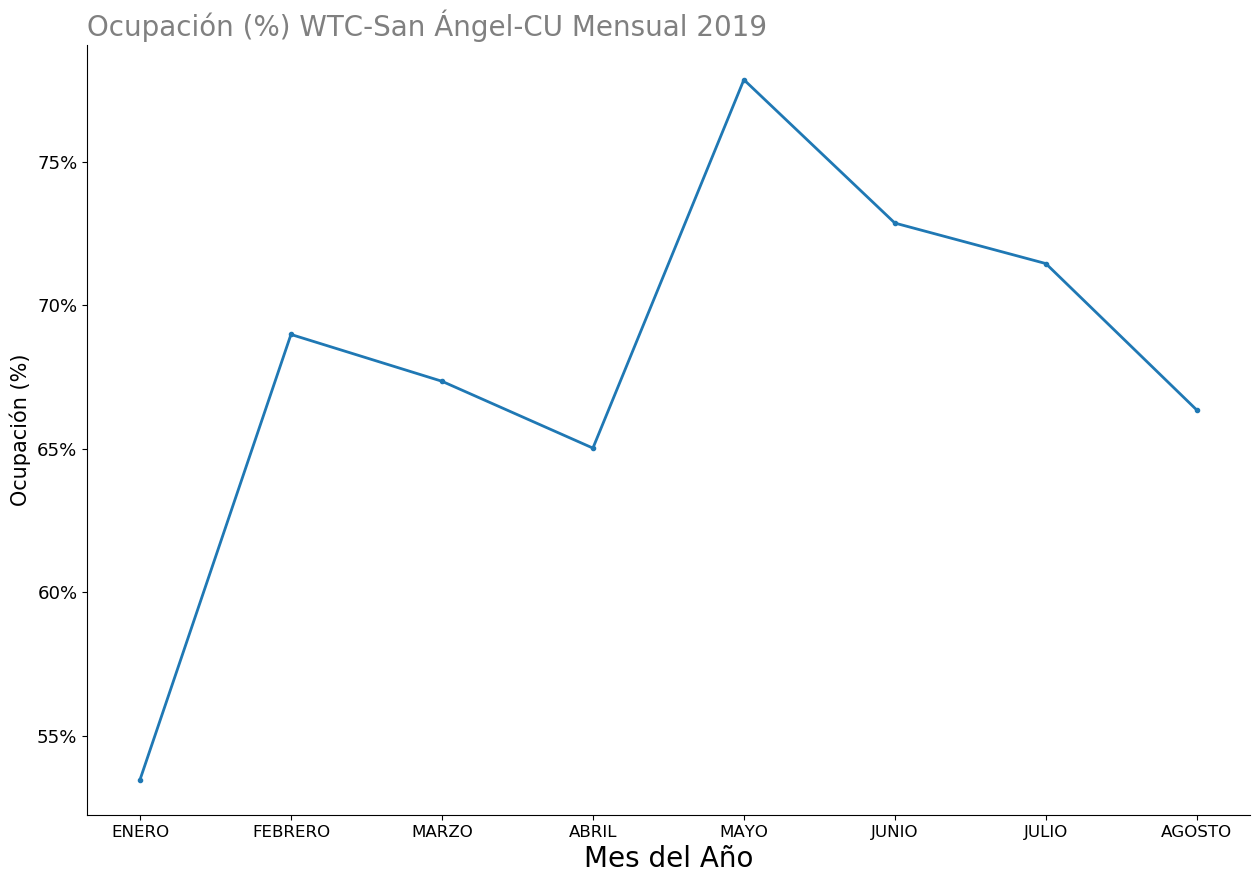

In [24]:
concentrado1 = conce_bren[conce_bren['AÑO']==2019]

table = pd.pivot_table(concentrado1, values = 'PRC_OCUP', index = ['CAT_Zonas_'], columns = ['MES'])
table = table.reset_index()
table = table[['CAT_Zonas_','ENERO', 'FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO']]



x1 = ['ENERO', 'FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO']

y1 = table.loc[0,'ENERO':'AGOSTO'].values*100
y2 = table.loc[1,'ENERO':'AGOSTO'].values*100
y3 = table.loc[2,'ENERO':'AGOSTO'].values*100
y4 = table.loc[3,'ENERO':'AGOSTO'].values*100
y5 = table.loc[4,'ENERO':'AGOSTO'].values*100
y6 = table.loc[5,'ENERO':'AGOSTO'].values*100
y7 = table.loc[6,'ENERO':'AGOSTO'].values*100
y8 = table.loc[7,'ENERO':'AGOSTO'].values*100
y9 = table.loc[8,'ENERO':'AGOSTO'].values*100
y10 = table.loc[9,'ENERO':'AGOSTO'].values*100
y11 = table.loc[10,'ENERO':'AGOSTO'].values*100
y12 = table.loc[11,'ENERO':'AGOSTO'].values*100


fig, ax = plt.subplots(figsize=(15, 10))
 

#ax.plot(x1, y1, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[0,'CAT_Zonas_'])
#ax.plot(x1, y2, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[1,'CAT_Zonas_'])
#ax.plot(x1, y3, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[2,'CAT_Zonas_'])
#ax.plot(x1, y4, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[3,'CAT_Zonas_'])
#ax.plot(x1, y5, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[4,'CAT_Zonas_'])
#ax.plot(x1, y6, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[5,'CAT_Zonas_'])
#ax.plot(x1, y7, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[6,'CAT_Zonas_'])
#ax.plot(x1, y8, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[7,'CAT_Zonas_'])
#ax.plot(x1, y9, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[8,'CAT_Zonas_'])
#ax.plot(x1, y10, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[9,'CAT_Zonas_'])
#ax.plot(x1, y11, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[10,'CAT_Zonas_'])
ax.plot(x1, y12, marker='.', color='#1f78b4', alpha = 1, linewidth=2, label=table.loc[11,'CAT_Zonas_'])

vals = ax.get_yticks()

ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals],fontsize = 13)
plt.xticks(fontsize = 12)
        
#plt.text('DICIEMBRE', table.loc[0,'DICIEMBRE'], " Aeropuerto-Foro Sol", horizontalalignment='left', size='large', color='#a6cee3')
#plt.text('DICIEMBRE', table.loc[1,'DICIEMBRE'], " Centro Histórico-Alameda", horizontalalignment='left', size='large', color='#1f78b4')
#plt.text('DICIEMBRE', table.loc[2,'DICIEMBRE'], " Chapultepec-Polanco", horizontalalignment='left', size='large', color='#b2df8a')
#plt.text('DICIEMBRE', table.loc[3,'DICIEMBRE'], " Condesa-Roma", horizontalalignment='left', size='large', color='#33a02c')
#plt.text('DICIEMBRE', table.loc[4,'DICIEMBRE'], " Coyoacán-Xoco-Atoyac", horizontalalignment='left', size='large', color='#fb9a99')
#plt.text('DICIEMBRE', table.loc[5,'DICIEMBRE'], " Iztapalapa-Central de Abasto5", horizontalalignment='left', size='large', color='#e31a1c')
#plt.text('DICIEMBRE', table.loc[6,'DICIEMBRE'], " Norte-Basílica de Guadalupe", horizontalalignment='left', size='large', color='#fdbf6f')
#plt.text('DICIEMBRE', table.loc[7,'DICIEMBRE'], " Perisur-Ajusco", horizontalalignment='left', size='large', color='#ff7f00')
#plt.text('DICIEMBRE', table.loc[8,'DICIEMBRE'], " Santa Fe-Desierto de los Leones", horizontalalignment='left', size='large', color='#cab2d6')
#plt.text('DICIEMBRE', table.loc[9,'DICIEMBRE'], " Tlalpan-Taxqueña", horizontalalignment='left', size='large', color='#6a3d9a')
#plt.text('DICIEMBRE', table.loc[10,'DICIEMBRE'], " Torre Mayor-Zona Rosa", horizontalalignment='left', size='large', color='#ffff99')        
#plt.text('DICIEMBRE', table.loc[11,'DICIEMBRE'], " W.T.C.-San Ángel-C.U", horizontalalignment='left', size='large', color='#b15928')        
        
plt.ylabel("Ocupación (%)",fontsize =15)
plt.xlabel("Mes del Año",fontsize =20)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
#ax.grid(axis ='both', color = 'silver', linewidth = 0.5, alpha = 0.5)
#ax.legend()
plt.title("Ocupación (%) WTC-San Ángel-CU Mensual 2019", loc='left', fontsize=20, fontweight=0, color='gray')

fig.savefig('/Users/daniel.rodriguez/Documents/HOTELES CDMX/GRAPH/prc_ocupa_mes_wtc19.png', format = 'png', dpi = 300, bbox_inches = "tight")



### ¿Cuántos Airbnb existen en un radio de 300m alrededor de los hoteles?

In [25]:
import geopandas as gpd
url = ('/Users/daniel.rodriguez/Documents/Hoteles CDMX/ZONAS_INF300/ZONAS_INFLUENCIA_300M.shp')
zona_300 = gpd.read_file(url)
zona_300.head()

OBJECTID                  CAT_Zonas_    Shape_Leng    Shape_Area  \
0         1       Aeropuerto - Foro Sol  47288.654131  8.307150e+06   
1         2  Centro Historico - Alameda  11835.621507  6.501867e+06   
2         3       Chapultepec - Polanco  46569.371481  9.716436e+06   
3         4         Condesa - Zona Rosa  15032.361805  4.619518e+06   
4         5                    Coyoacan   3094.549327  5.454087e+05   

                                            geometry  
0  (POLYGON ((489386.3210000005 2143667.6678, 489...  
1  POLYGON ((484872.9250999996 2150198.906400001,...  
2  (POLYGON ((480837.1151000001 2145995.589, 4808...  
3  POLYGON ((483863.7829 2147510.852399999, 48387...  
4  POLYGON ((482761.8032 2141292.4705, 482761.760...

In [107]:
zona_300.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
OBJECTID      13 non-null int64
CAT_Zonas_    13 non-null object
Shape_Leng    13 non-null float64
Shape_Area    13 non-null float64
geometry      13 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 648.0+ bytes


In [108]:
zona_300.crs

{'init': 'epsg:32614'}

In [79]:
import geopandas as gpd
url = ('/Users/daniel.rodriguez/Documents/Hoteles CDMX/ZONAS_TURISTICAS/ZONAS_TURISTICAS_SEP2019.shp')
zona_tur = gpd.read_file(url)
zona_tur.head()

CAT_Zonas_  \
0  Iztapalapa - Central de Abastos   
1          Torre Mayor - Zona Rosa   
2                   Condesa - Roma   
3            Chapultepec - Polanco   
4                 Perisur - Ajusco   

                                            geometry  
0  POLYGON ((487189.3160802843 2140407.242675485,...  
1  POLYGON ((484568.3957079658 2149180.813199172,...  
2  POLYGON ((483871.9510054048 2147957.256822979,...  
3  POLYGON ((480012.7437940165 2152895.103658728,...  
4  POLYGON ((472336.869970886 2139462.249295114, ...

In [82]:
zona_tur.crs ={'init':'epsg:32614'}
zona_tur.crs

{'init': 'epsg:32614'}

In [84]:
zona12.head()

CAT_Zonas_  \
0  Iztapalapa - Central de Abastos   
1          Torre Mayor - Zona Rosa   
2                   Condesa - Roma   
3            Chapultepec - Polanco   
4                 Perisur - Ajusco   

                                            geometry  
0  POLYGON ((-99.12197974597882 19.35766192285855...  
1  POLYGON ((-99.14700654644166 19.43693257899282...  
2  POLYGON ((-99.15363069326013 19.42586952577939...  
3  POLYGON ((-99.19044419899467 19.47045898200271...  
4  POLYGON ((-99.26338605979838 19.34897216208141...

In [83]:
zona12 = zona_tur.to_crs({'init':'epsg:4326'})

In [64]:
new_hotels = pd.read_csv('/Users/daniel.rodriguez/Documents/HOTELES CDMX/BASES PROCESADAS/nuevo_hoteles.csv',sep = ',', encoding = 'utf-8',header = 0, index_col =False)
new_hotels.head()

hotel    latitud   longitud
0  Living Cefiro by Stara  19.307440 -99.180707
1   Sleep Inn Mexico City  19.363216 -99.283047
2           Hotel Ryo Kan  19.428835 -99.171482
3          Hotel El Greco  19.385924 -99.175834

In [65]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(new_hotels['longitud'], new_hotels['latitud'])]
new1 = new_hotels.drop(['longitud', 'latitud'], axis=1)
crs = {'init': 'epsg:4326'}
gdf_new = GeoDataFrame(new1, crs = crs, geometry=geometry)
gdf_new.head()

hotel                              geometry
0  Living Cefiro by Stara           POINT (-99.180707 19.30744)
1   Sleep Inn Mexico City          POINT (-99.283047 19.363216)
2           Hotel Ryo Kan          POINT (-99.171482 19.428835)
3          Hotel El Greco  POINT (-99.17583399999999 19.385924)

In [87]:
zona12.CAT_Zonas_.unique()

array(['Iztapalapa - Central de Abastos', 'Torre Mayor - Zona Rosa',
       'Condesa - Roma', 'Chapultepec - Polanco', 'Perisur - Ajusco',
       'Santa Fe - Desierto de los Leones',
       'Norte - Basilica de Guadalupe', 'Tlalpan - TaxqueÃ±a', 'Coyoacan',
       'WTC - San Angel - CU', 'Centro Historico - Alameda',
       'Aeropuerto - Foro Sol', 'Xochimilco - Milpa Alta -Tlahuac'],
      dtype=object)

In [ ]:
zona12[zona12['CAT_Zonas_']=='']

In [88]:
con_new = gpd.sjoin(gdf_new,zona12, how = 'inner', op = 'intersects')
con_new

hotel                              geometry  index_right  \
0  Living Cefiro by Stara           POINT (-99.180707 19.30744)            9   
3          Hotel El Greco  POINT (-99.17583399999999 19.385924)            9   
1   Sleep Inn Mexico City          POINT (-99.283047 19.363216)            5   
2           Hotel Ryo Kan          POINT (-99.171482 19.428835)            1   

                          CAT_Zonas_  
0               WTC - San Angel - CU  
3               WTC - San Angel - CU  
1  Santa Fe - Desierto de los Leones  
2            Torre Mayor - Zona Rosa

(-99.38615527354291,
 -98.91907174246134,
 19.021010633017358,
 19.619983310772437)

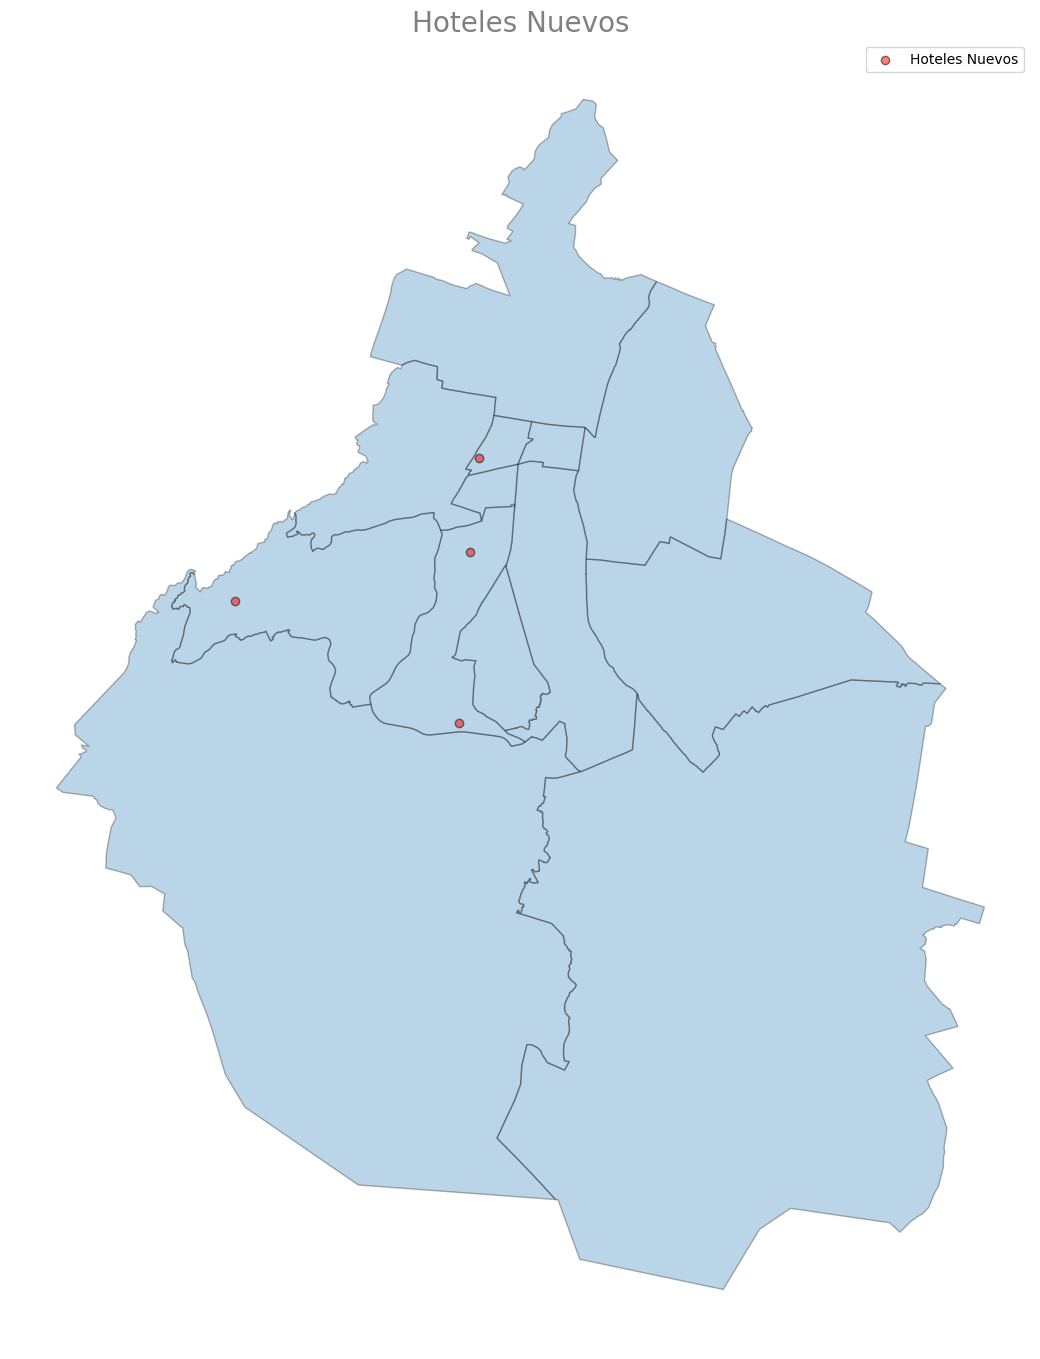

In [85]:
ig, ax = plt.subplots(figsize=(20,17))
zona12.plot(ax = ax, alpha = 0.3,edgecolor='black', label = 'Zonas')
gdf_new.plot(ax = ax, alpha = 0.5, color ='r', edgecolor='black', label = 'Hoteles Nuevos')
plt.title('Hoteles Nuevos', fontsize=20, fontweight=0, color='gray')
plt.legend()
plt.axis('off')
#ctx.add_basemap(ax, zoom =12,url=ctx.sources.ST_TONER_LITE)

In [109]:
air = pd.read_csv('/Users/daniel.rodriguez/Documents/HOTELES CDMX/AIRBNB/listings.csv',sep = ',', encoding = 'utf-8',header = 0, index_col =False)
air.head()

/anaconda3/envs/poder/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id                         listing_url       scrape_id last_scraped  \
0  14714  https://www.airbnb.com/rooms/14714  20190716153352   2019-07-16   
1  22787  https://www.airbnb.com/rooms/22787  20190716153352   2019-07-16   
2  33681  https://www.airbnb.com/rooms/33681  20190716153352   2019-07-17   
3  35797  https://www.airbnb.com/rooms/35797  20190716153352   2019-07-16   
4  44616  https://www.airbnb.com/rooms/44616  20190716153352   2019-07-16   

                                                name  \
0         Private room c/ bathroom . Colonia Juarez.   
1  Sunny suite w/ queen size bed, inside boutique...   
2                                    Couple of Rooms   
3                                        Villa Dante   
4                                  CONDESA HAUS  B&B   

                                             summary  \
0  Departamento ubicado a dos cuadras de Reforma,...   
1  This suite inside El Patio 77 - an eco-friendl...   
2                                                NaN   
3  Dentro de Villa un estudio de arte con futon, ...   
4  A new concept of hosting in mexico through a b...   

                                               space  \
0  La habitación es super luminosa, cuenta con un...   
1  El Patio 77 is the first eco-friendly bed and ...   
2  You will get the best view of one of the bigge...   
3  please go to (URL HIDDEN) and  see the place a...   
4  Stay with us at this bed & breakfast named CON...   

                                         description experiences_offered  \
0  Departamento ubicado a dos cuadras de Reforma,...                none   
1  This suite inside El Patio 77 - an eco-friendl...                none   
2  You will get the best view of one of the bigge...                none   
3  Dentro de Villa un estudio de arte con futon, ...                none   
4  A new concept of hosting in mexico through a b...                none   

                               neighborhood_overview  \
0  La Colonia Juarez es hipster, bohemia, llena d...   
1  Up-and-coming San Rafael neighborhood combines...   
2                                                NaN   
3  Centro comercial Santa Fe, parque interlomas y...   
4                                                NaN   

                                               notes  \
0  No se permiten fiestas, mascotas, ni fumar den...   
1                                                NaN   
2                                                NaN   
3  Si te gustan la tipo haciendas o decoración co...   
4                                                NaN   

                                             transit  \
0  El metrobús Reforma  y el metro Cuauhtémoc (lí...   
1  Circuito Interior, Ribera de San Cosme, and In...   
2                                                NaN   
3                        Uber es buena opción o taxi   
4                                                NaN   

                                              access  \
0  La cocina, la sala, el roof garde en el tercer...   
1  Breakfast is served 8am to 10am. Concierge and...   
2                                                NaN   
3                                 Jardin muy Amplio.   
4                                                NaN   

                                         interaction  \
0                                                NaN   
1  Trilingual concierge service is here to help y...   
2                                                NaN   
3  Cualquier duda contáctenos por esta vía. Se le...   
4                                                NaN   

                                         house_rules  thumbnail_url  \
0                                                NaN            NaN   
1  This rooms share a bathroom between 2 rooms.  ...            NaN   
2                                  Do not disturbe !            NaN   
3  Se renta un  estudio dentro de la villa. Y est...            NaN   
4                                  

In [118]:
air_xy = air[['id','longitude','latitude']]
air_xy.columns

Index(['id', 'longitude', 'latitude'], dtype='object')

In [132]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(air_xy['longitude'], air_xy['latitude'])]
air_xy1 = air_xy.drop(['longitude', 'latitude'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(air_xy1, crs = crs, geometry=geometry)
gdf.head()

id                             geometry
0  14714  POINT (-99.15510999999999 19.43035)
1  22787           POINT (-99.16324 19.44076)
2  33681           POINT (-99.21848 19.27215)
3  35797  POINT (-99.27334999999999 19.38399)
4  44616           POINT (-99.17645 19.41006)

In [133]:
gdf.crs

{'init': 'epsg:4326'}

In [134]:
air_shp = gdf.to_crs({'init':'epsg:32614'})
air_shp.head()

id                                     geometry
0  14714  POINT (483717.1004987835 2148453.175128175)
1  22787  POINT (482864.7321007056 2149605.865768956)
2  33681   POINT (477042.601701933 2130955.139789263)
3  35797     POINT (471296.4931235336 2143338.709071)
4  44616       POINT (481474.5985634 2146210.1764826)

In [184]:
import contextily as ctx
air1 = air_shp.to_crs(epsg = 3857)
zona1 = zona_300.to_crs(epsg = 3857)

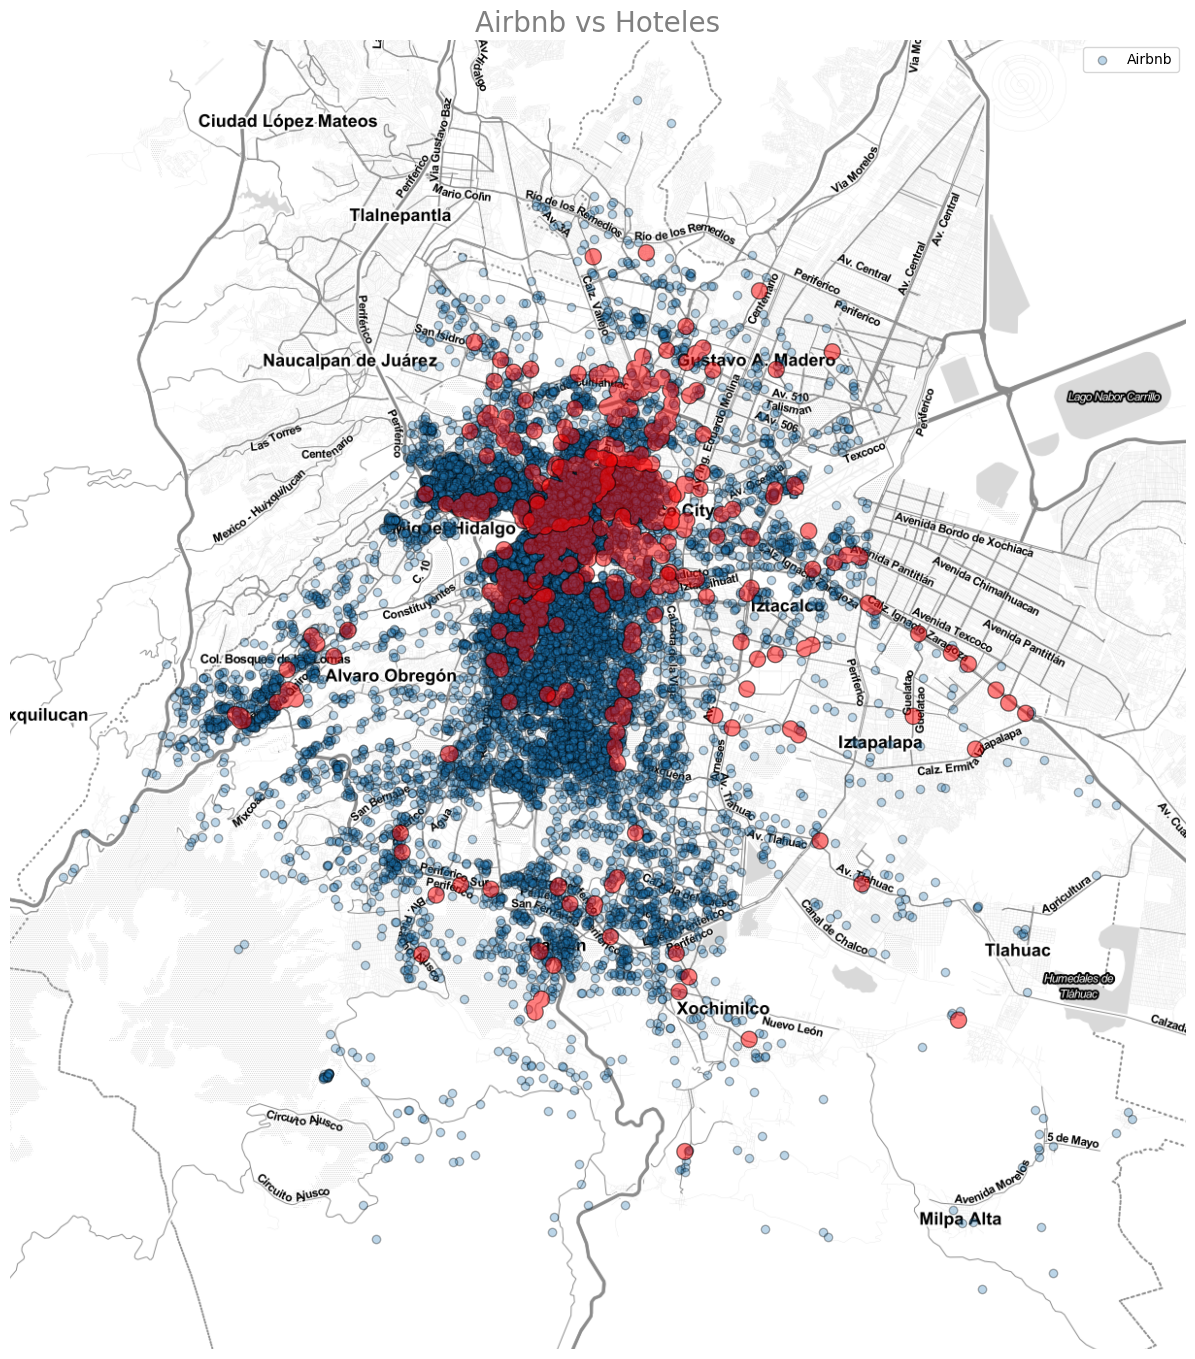

In [237]:
fig, ax = plt.subplots(figsize=(20,17))
air1.plot(ax = ax, alpha = 0.3,edgecolor='black', label = 'Airbnb')
zona1.plot(ax = ax, alpha = 0.5, color ='r', edgecolor='black', label = 'Hoteles Muestra')
plt.title('Airbnb vs Hoteles', fontsize=20, fontweight=0, color='gray')
plt.legend()
plt.axis('off')
ctx.add_basemap(ax, zoom =12,url=ctx.sources.ST_TONER_LITE)
fig.savefig('/Users/daniel.rodriguez/Documents/HOTELES CDMX/GRAPH/mapairbnbvshoteles.png', format = 'png', dpi = 300, bbox_inches = "tight")

In [143]:
joined = gpd.sjoin(air_shp, zona_300, op = 'within')
joined.head()

id                                     geometry  index_right  \
0    14714  POINT (483717.1004987835 2148453.175128175)           10   
1    22787  POINT (482864.7321007056 2149605.865768956)           10   
10   99972  POINT (482815.5982493593 2149818.367295615)           10   
16  180808  POINT (482318.1542197064 2147782.822795313)           10   
23  245507  POINT (482083.0875080909 2147873.789923726)           10   

    OBJECTID               CAT_Zonas_    Shape_Leng    Shape_Area  
0         11  Torre Mayor - Zona Rosa  13824.706035  6.642480e+06  
1         11  Torre Mayor - Zona Rosa  13824.706035  6.642480e+06  
10        11  Torre Mayor - Zona Rosa  13824.706035  6.642480e+06  
16        11  Torre Mayor - Zona Rosa  13824.706035  6.642480e+06  
23        11  Torre Mayor - Zona Rosa  13824.706035  6.642480e+06

In [146]:
len(joined)

9886

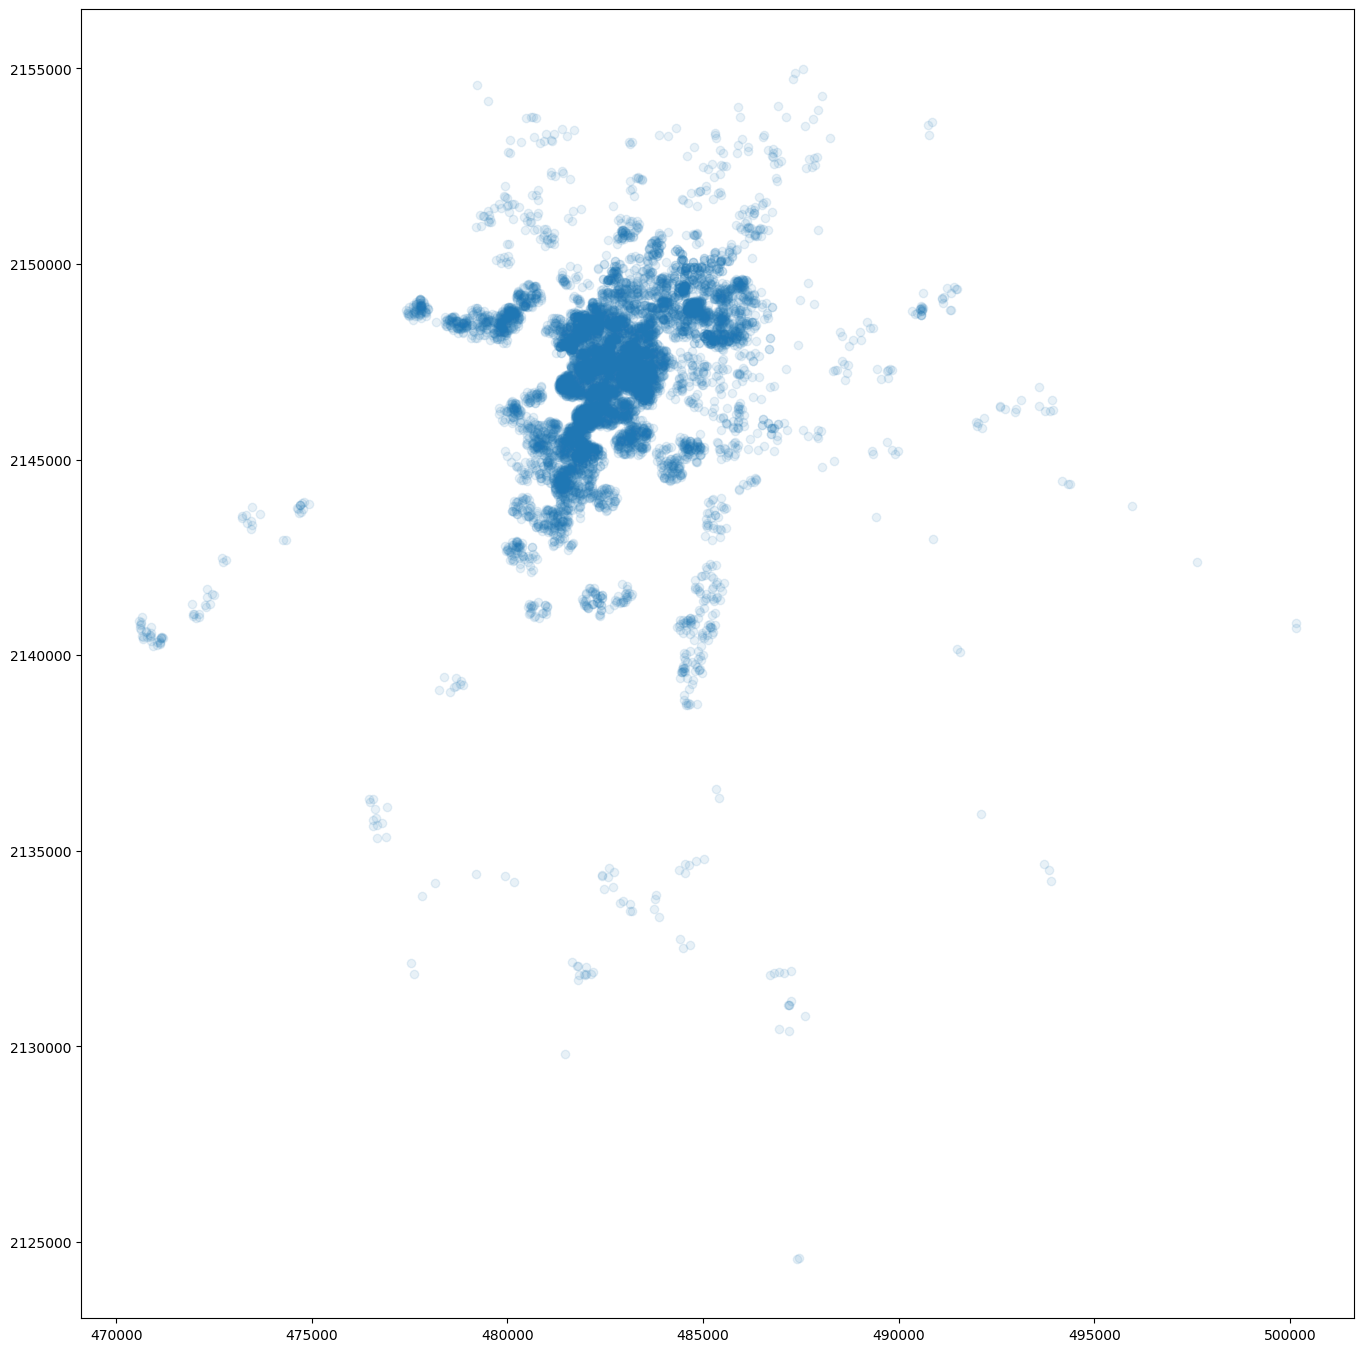

In [144]:
fig, ax = plt.subplots(figsize=(20,17))
joined.plot(ax = ax, alpha = 0.1)

In [238]:
j_g = joined.groupby('CAT_Zonas_').count().reset_index()
j_g_count = j_g[['CAT_Zonas_','id']]
j_g_count = j_g_count.sort_values('id', ascending = False)
j_g_count.loc[3, 'CAT_Zonas_']='Condesa-Roma'


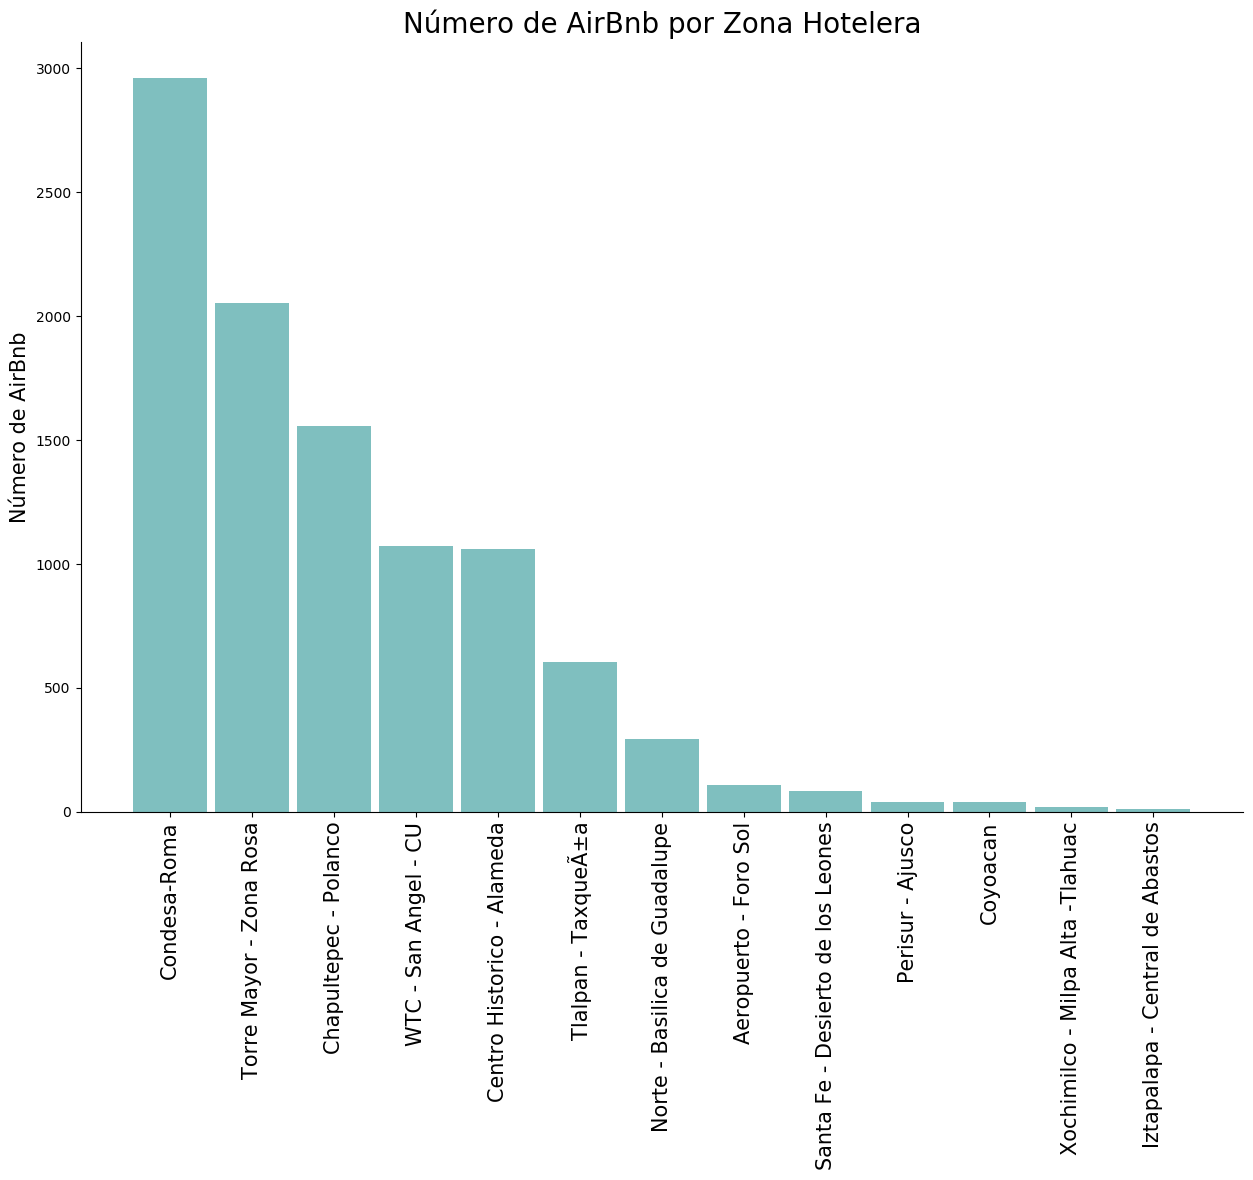

In [239]:
#Graficamos
import random
fig, ax = plt.subplots(figsize = (15, 10))
# Plot Bars

barlist = ax.bar(j_g_count['CAT_Zonas_'], j_g_count['id'], color='teal', alpha = 0.5,width=.9)
#barlist[22].set_color('r')

#for i, val in enumerate(un_pob_cons['tas_consultorios'].values):
    #plt.text(i, val-0.04, round(val, 2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500,'color':'white', 'size':10})
    
# Decoration
plt.gca().set_xticklabels(j_g_count['CAT_Zonas_'], rotation=90, horizontalalignment= 'center')
plt.title('Número de AirBnb por Zona Hotelera', fontsize=20)
plt.ylabel('Número de AirBnb',fontsize=15)
plt.xticks(fontsize = 15)
#plt.ylim(0, 0.7)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
plt.savefig('/Users/daniel.rodriguez/Documents/Hoteles CDMX/GRAPH/airbnb.png', format = 'png', dpi = 300,bbox_inches = "tight")
plt.show()

### Verificar por mes cuales hoteles o zonas están por arriba o por debajo del promedio 

In [31]:
hotel_mx1 = pd.read_csv('/Users/daniel.rodriguez/Documents/Hoteles CDMX/hotel_matrix.csv',sep = ',', encoding = 'utf-8',header = 0, index_col =False)
hotel_mx1.head()



RTCDMX                            NOMBRE_HOTEL                CAT_Zonas_  \
0    6642                      Las Suites Polanco       Chapultepec-Polanco   
1    1158                          Hotel Mazatlan  Centro Historico-Alameda   
2    5181  Holiday Inn & Suites Mexico Medica Sur            Perisur-Ajusco   
3    5341        Filadelfia Suites Hotel Boutique     W.T.C.-San Angel-C.U.   
4    6668          City Express Patio Universidad      Coyoacan-Xoco-Atoyac   

   ENERO  FEBRERO  MARZO  ABRIL  MAYO  JUNIO  JULIO  AGOSTO  SEPTIEMBRE  \
0      0        1      1      1     0      1      1       1           1   
1      1        1      1      1     0      1      1       0           1   
2      0        1      0      1     1      1      1       1           1   
3      0        1      1      1     1      1      1       1           0   
4      0        1      0      1     1      0      1       1           1   

   OCTUBRE  NOVIEMBRE  DICIEMBRE  
0        1          1          0  
1        1          1          0  
2        1          1          0  
3        1          1          0  
4        1          1          0

In [32]:
hotel_mx1.set_index('NOMBRE_HOTEL', inplace = True)


In [33]:
hotel_mx2 = hotel_mx1[['ENERO', 'FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']]


In [34]:
hotel_mx3 = hotel_mx2[~hotel_mx2['ENERO']<0]
hotel_mx3[0:2]

In [38]:
p1_hotel_mx3 = hotel_mx3[0:32]
p2_hotel_mx3 = hotel_mx3[32:65]
p3_hotel_mx3 = hotel_mx3[65:98]

In [37]:
hotel_mx4 = hotel_mx1[~hotel_mx1['ENERO']<0]
e = list(hotel_mx4.CAT_Zonas_)
len(e)

98

In [39]:
lista_pos1 = [0.6,1.6,2.6,3.6,4.6,5.6,6.6,7.6,8.6,9.6,10.6,11.6,12.6,13.6,14.6,15.6,16.6,
              17.6,18.6,19.6,20.6,21.6,22.6,23.6,24.6,25.6,26.6,27.6,28.6,29.6,30.6,31.6]

lista_pos2 = [0.6,1.6,2.6,3.6,4.6,5.6,6.6,7.6,8.6,9.6,10.6,11.6,12.6,13.6,14.6,15.6,16.6,
              17.6,18.6,19.6,20.6,21.6,22.6,23.6,24.6,25.6,26.6,27.6,28.6,29.6,30.6,31.6,
              32.6]

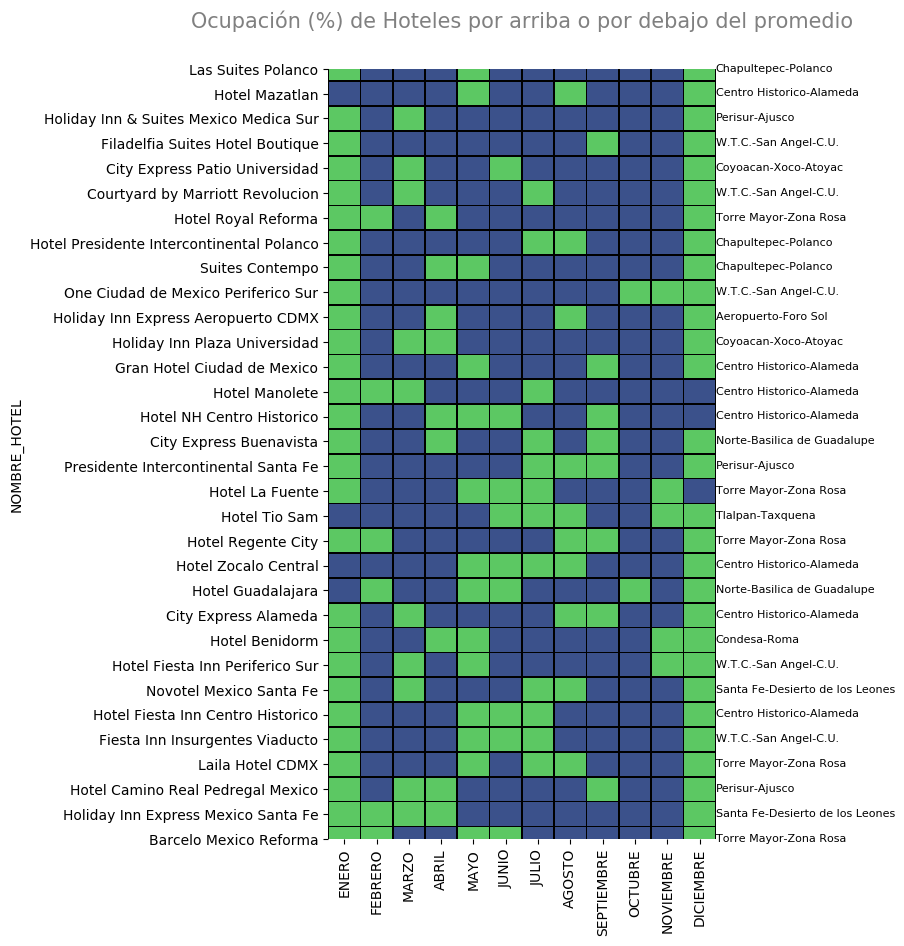

In [40]:
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
fig = plt.figure(figsize=(5,10))

viridisBig = cm.get_cmap('viridis_r', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))


ax = sns.heatmap(p1_hotel_mx3,
                 cmap = newcmp,
                linewidths = .5, 
                cbar=False,
                linecolor = 'black', 
)


for zona, pos in zip(e[0:32],lista_pos1):
    plt.text(12,pos, zona, fontsize=8)

ax.set_title("Ocupación (%) de Hoteles por arriba o por debajo del promedio", fontsize = 15,pad = 30,color = 'gray')
fig.savefig('/Users/daniel.rodriguez/Documents/Hoteles CDMX/GRAPH/matrix_mean1.png', format = 'png', dpi = 300, bbox_inches = "tight")

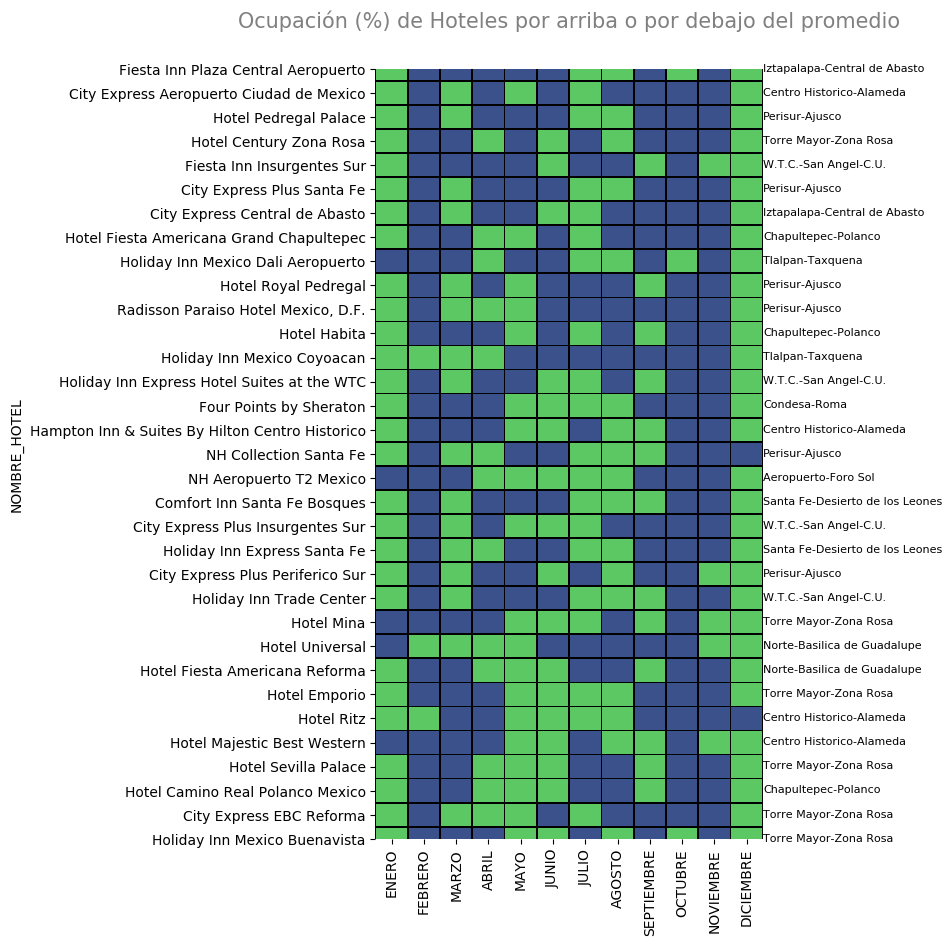

In [41]:
import seaborn as sns
fig = plt.figure(figsize=(5,10))

viridisBig = cm.get_cmap('viridis_r', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))

ax = sns.heatmap(p2_hotel_mx3,
                cmap = newcmp,
                linewidths = .5, 
                cbar=False,
                linecolor = 'black', 
                )


for zona, pos in zip(e[32:65],lista_pos2):
    plt.text(12,pos, zona, fontsize=8)

ax.set_title("Ocupación (%) de Hoteles por arriba o por debajo del promedio", pad = 30, fontsize = 15,color = 'gray')
fig.savefig('/Users/daniel.rodriguez/Documents/Hoteles CDMX/GRAPH/matrix_mean2.png', format = 'png', dpi = 300, bbox_inches = "tight")

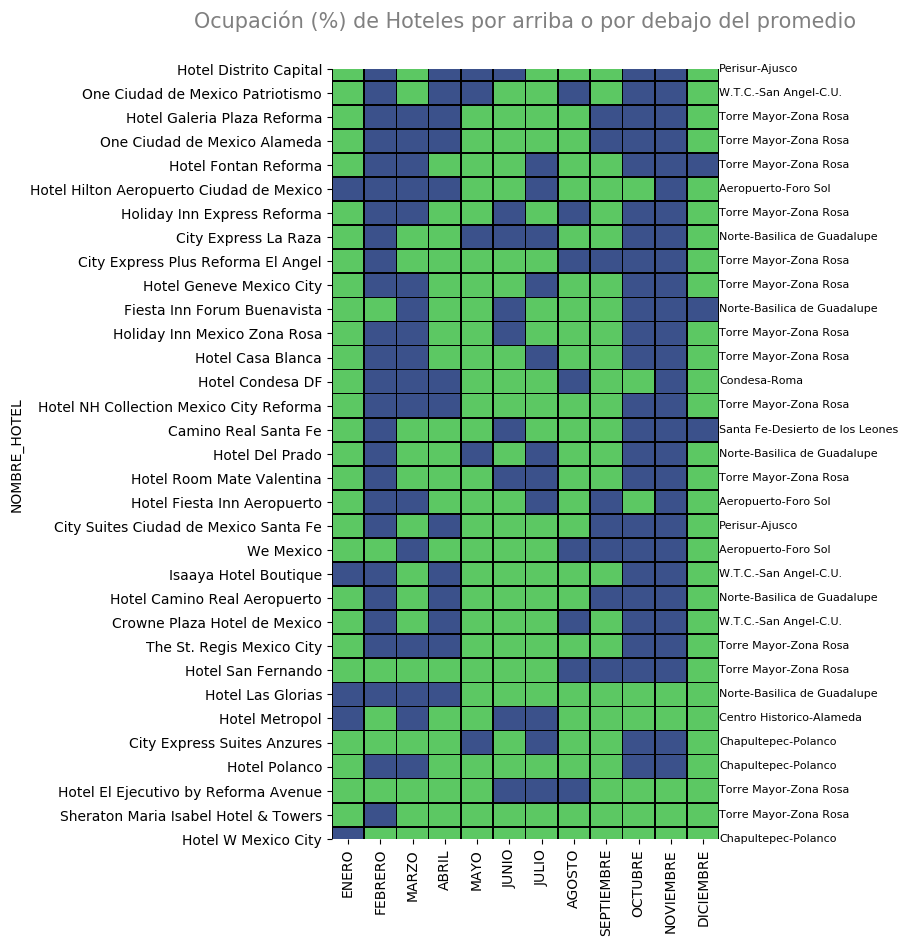

In [42]:
import seaborn as sns
fig = plt.figure(figsize=(5,10))

viridisBig = cm.get_cmap('viridis_r', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))

ax = sns.heatmap(p3_hotel_mx3,
                cmap = newcmp,
                linewidths = .5, 
                cbar=False,
                linecolor = 'black', 
                )


for zona, pos in zip(e[65:98],lista_pos2):
    plt.text(12,pos, zona, fontsize=8)


ax.set_title("Ocupación (%) de Hoteles por arriba o por debajo del promedio", pad = 30, fontsize = 15,color = 'gray')
fig.savefig('/Users/daniel.rodriguez/Documents/Hoteles CDMX/GRAPH/matrix_mean3.png', format = 'png', dpi = 300, bbox_inches = "tight")

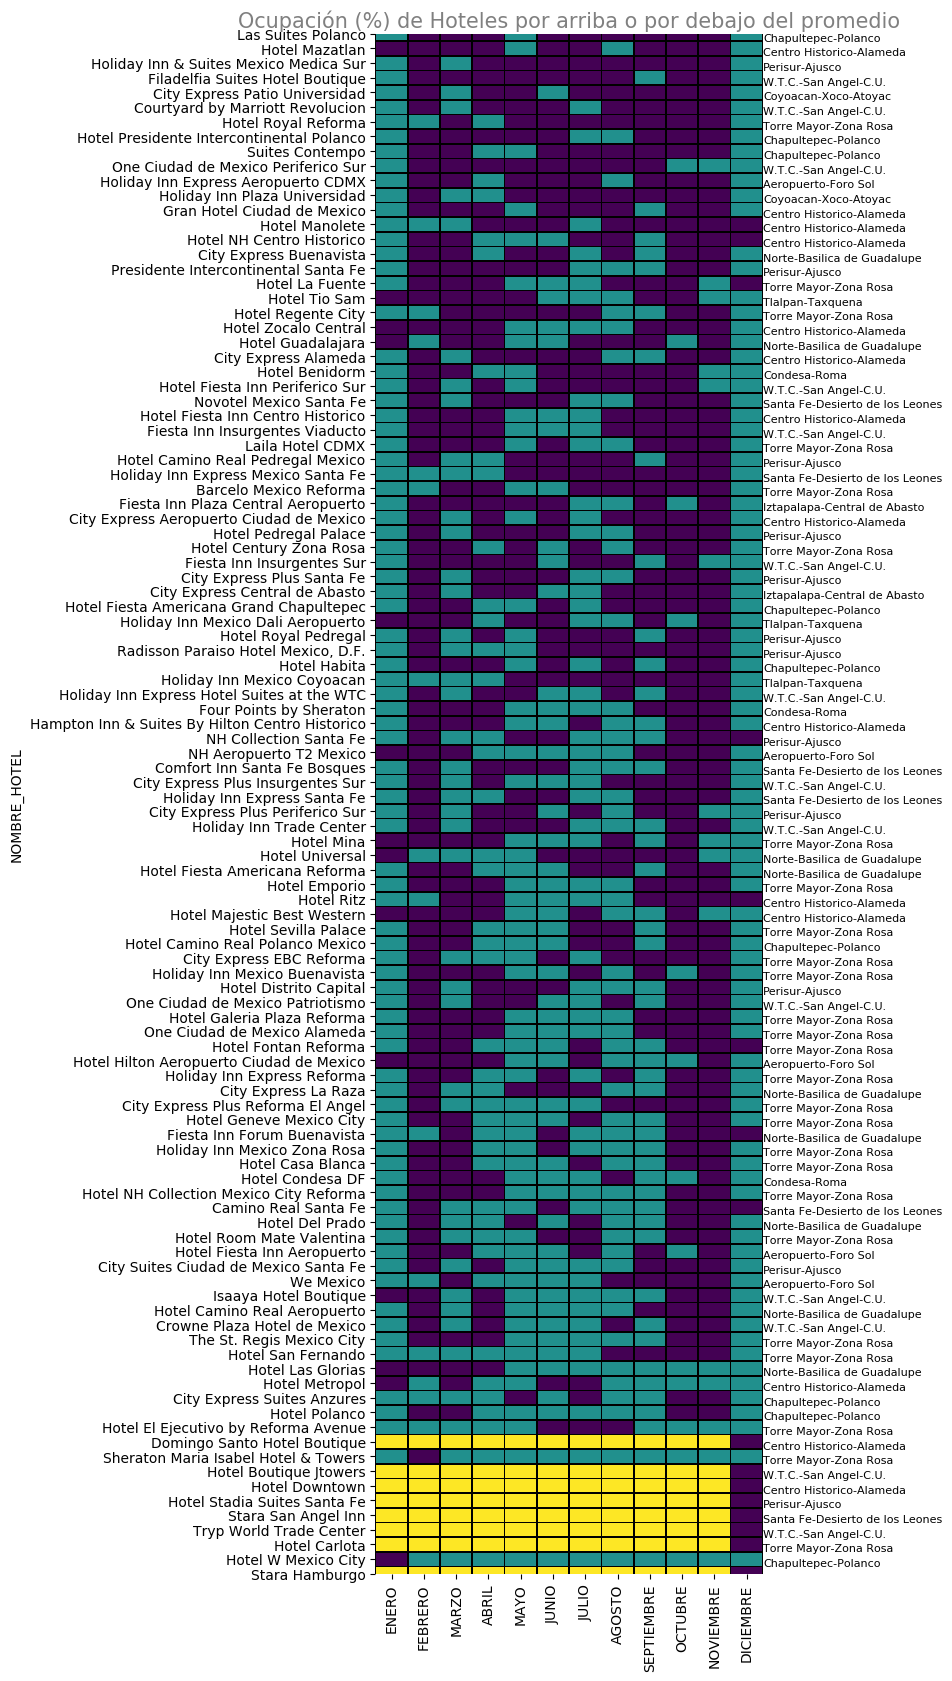

In [469]:
import seaborn as sns
fig = plt.figure(figsize=(5,20))



ax = sns.heatmap(hotel_mx2,
                cmap = 'viridis_r',
                linewidths = .5, 
                #annot = True, 
                #fmt = ".0f", 
                #annot_kws = {'size':10},
                cbar=False,
                linecolor = 'black', 
                )


for zona, pos in zip(e,lista_y_pos):
    plt.text(12,pos, zona, fontsize=8)


ax.set_title("Ocupación (%) de Hoteles por arriba o por debajo del promedio", fontsize = 15,pad = 5,color = 'gray')
fig.savefig('/Users/daniel.rodriguez/Documents/Hoteles CDMX/GRAPH/matrix_meanall.png', format = 'png', dpi = 300, bbox_inches = "tight")

In [ ]:
concentrado1 = conce_bren[conce_bren['AÑO']==2018]
concentrado1_g = concentrado1.groupby(['CAT_Zonas_']).mean().reset_index()
concentrado1_g = concentrado1_g[['CAT_Zonas_','PRC_OCUP']]





In [ ]:
concentrado1_mensual = concentrado1.groupby(['CAT_Zonas_','MES']).mean().reset_index()
concentrado1_mensual = concentrado1_mensual[['CAT_Zonas_','MES','PRC_OCUP']]
table_zona = pd.pivot_table(concentrado1_mensual, values = 'PRC_OCUP', index = ['CAT_Zonas_'], columns = ['MES']).reset_index()
table_zona = table_zona[['CAT_Zonas_','ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']]


In [ ]:
concentrado1_g = concentrado1_g.merge(table_zona[['CAT_Zonas_','ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']], how = 'left')


In [55]:
columnas = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']
col_ = ['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE',
        'OCTUBRE','NOVIEMBRE','DICIEMBRE']

for c, col in zip(columnas, col_):
    concentrado1_g[c] = np.where(concentrado1_g[col]>concentrado1_g['PRC_OCUP'], 1, 0)
    

In [57]:
concentrado2_g = concentrado1_g[['CAT_Zonas_','ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']]
concentrado2_g.set_index('CAT_Zonas_', inplace = True)
concentrado2_g


ENE  FEB  MAR  ABR  MAY  JUN  JUL  AGO  SEP  \
CAT_Zonas_                                                                     
Aeropuerto-Foro Sol                0    1    1    0    0    0    0    0    1   
Centro Historico-Alameda           0    1    1    1    0    0    1    0    0   
Chapultepec-Polanco                0    1    1    0    0    1    0    1    1   
Condesa-Roma                       0    1    1    1    0    1    1    1    1   
Coyoacan-Xoco-Atoyac               0    1    0    1    1    0    1    1    1   
Iztapalapa-Central de Abasto       0    1    1    1    1    0    0    1    1   
Norte-Basilica de Guadalupe        0    1    1    0    0    1    1    0    0   
Perisur-Ajusco                     0    1    0    1    0    1    0    0    1   
Santa Fe-Desierto de los Leones    0    1    0    0    1    1    0    0    1   
Tlalpan-Taxquena                   0    1    1    0    1    1    0    0    1   
Torre Mayor-Zona Rosa              0    1    1    0    0    1    1    0    0   
W.T.C.-San Angel-C.U.              0    1    0    1    1    1    0    1    0   

                                 OCT  NOV  DIC  
CAT_Zonas_                                      
Aeropuerto-Foro Sol                1    1    0  
Centro Historico-Alameda           1    1    0  
Chapultepec-Polanco                1    1    0  
Condesa-Roma                       1    1    0  
Coyoacan-Xoco-Atoyac               1    1    0  
Iztapalapa-Central de Abasto       1    1    0  
Norte-Basilica de Guadalupe        1    1    0  
Perisur-Ajusco                     1    1    0  
Santa Fe-Desierto de los Leones    1    1    0  
Tlalpan-Taxquena                   1    1    0  
Torre Mayor-Zona Rosa              1    1    0  
W.T.C.-San Angel-C.U.              1    1    0

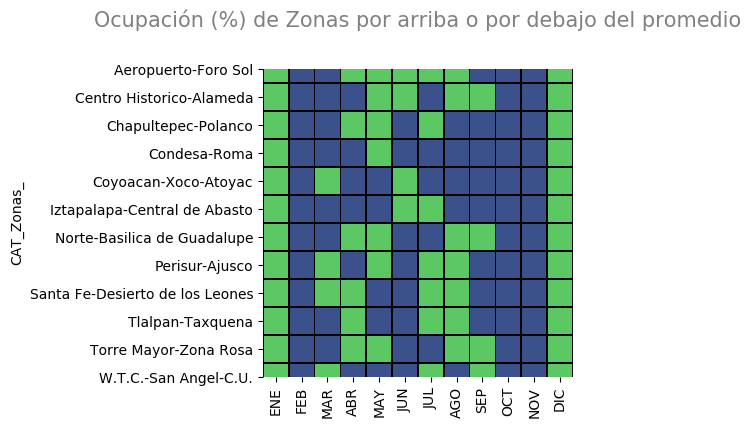

In [61]:
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
fig = plt.figure(figsize=(4,4))

viridisBig = cm.get_cmap('viridis_r', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))


ax = sns.heatmap(concentrado2_g,
                 cmap = newcmp,
                linewidths = .5, 
                cbar=False,
                linecolor = 'black', 
)


#for zona, pos in zip(e[0:32],lista_pos1):
    #plt.text(12,pos, zona, fontsize=8)

ax.set_title("Ocupación (%) de Zonas por arriba o por debajo del promedio", fontsize = 15,pad = 30,color = 'gray')
fig.savefig('/Users/daniel.rodriguez/Documents/Hoteles CDMX/GRAPH/matrix_mean_zone.png', format = 'png', dpi = 300, bbox_inches = "tight")